In [82]:
#imported the necessary libraries
import warnings
warnings.filterwarnings("ignore")


#imported other Python library's
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import scipy.stats as stats

from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV

# Step 1:- Reading and understanding the data

In [83]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
print(data.shape)

(1460, 81)


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling Data types

In [86]:
data['MSSubClass'] = data['MSSubClass'].astype("object")
data['OverallQual'] = data['OverallQual'].astype("object")
data['OverallCond'] = data['OverallCond'].astype("object")

# Handaling missing values
Replacing few NA values to relevant names
We can see from the data dictonary that for few columns the NA value represents the not present of the feature in the house instead of representing the missing values. Hence, we need to impute the NA or the missing values for those columns to the relevant name.

# Handling Missing Values

In [87]:
data['Alley'] = data['Alley'].replace(np.nan, 'No Alley')
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')
data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')
data['FireplaceQu'] = data['FireplaceQu'].replace(np.nan, 'No Fireplace')
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['PoolQC'] = data['PoolQC'].replace(np.nan, 'No Pool')
data['Fence'] = data['Fence'].replace(np.nan, 'No Fence')
data['MiscFeature'] = data['MiscFeature'].replace(np.nan, 'No MiscFeature')

# Handling Missing values

In [88]:
nullval = pd.DataFrame()
nullval['Features'] = data.columns
nullval['Nulls in feature'] = [round((data[i].isnull().sum()/len(data[i].index))*100,4) for i in data.columns]
nullval = nullval.sort_values(by = "Nulls in feature", ascending = False)
nullval

,Features,Nulls in feature
3,LotFrontage,17.7397
59,GarageYrBlt,5.5479
25,MasVnrType,0.5479
26,MasVnrArea,0.5479
42,Electrical,0.0685
53,KitchenQual,0.0000
58,GarageType,0.0000
57,FireplaceQu,0.0000
56,Fireplaces,0.0000
55,Functional,0.0000


# LotFrontage

In [89]:
# We can see that LotFrontage column has 17.74% missing values
# Let's see the distribution of the value of the LotFrontage column
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [90]:
# Imputing missing values of LotFrontage with median
data.loc[np.isnan(data['LotFrontage']), 'LotFrontage'] = data['LotFrontage'].median()

In [91]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [92]:
# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
data.loc[pd.isnull(data['GarageYrBlt']), ['GarageYrBlt']] = 0

# MasVnrArea

In [93]:
data['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [94]:
data.loc[pd.isnull(data['MasVnrArea']), ['MasVnrArea']] = 0

# MasVnrType

In [95]:
# Treating the missing values for MasVnrType column
data['MasVnrType'].value_counts()
#Deleting this column due to high unknow NONE values

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [96]:
data.loc[pd.isnull(data['MasVnrType']), ['MasVnrType']] = 'None'

# Electrical

In [97]:
# Treating missing values for Electrical column
# Let us check the count for values in Electrical 
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [98]:
# Imputing Electrical column missing values with SBrkr
data.loc[pd.isnull(data['Electrical']), ['Electrical']] = 'SBrkr'

In [99]:
#changing data type of Gararge yr built to int from float
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

# Deleted redundandt variables

__Removing few columns :-__
YrSold and YearBuilt columns. As we derived the age of the house, so we do not need these columns anymore in our analysis.
YearRemodAdd and GarageYrBlt columns - As these columns will not be such useful while doing our analysis.

In [100]:
#DERIVED VARIABLES which might make more sense than year
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['Remod_Age'] = data['YrSold'] - data['YearRemodAdd']
data['Garage_Age'] = data['YrSold'] - data['GarageYrBlt']
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [102]:
print(data.duplicated().sum())

0


In [103]:
data.describe().round(1)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,Remod_Age,Garage_Age
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,69.9,10516.8,103.1,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,0.1,1.6,0.4,2.9,1.0,6.5,0.6,1.8,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,180921.2,36.5,23.0,139.1
std,421.6,22.0,9981.3,180.7,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,0.2,0.6,0.5,0.8,0.2,1.6,0.6,0.7,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,79442.5,30.3,20.6,453.7
min,1.0,21.0,1300.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34900.0,0.0,-1.0,0.0
25%,365.8,60.0,7553.5,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,129975.0,8.0,4.0,7.0
50%,730.5,69.0,9478.5,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,163000.0,35.0,14.0,30.0
75%,1095.2,79.0,11601.5,164.2,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,214000.0,54.0,41.0,50.0
max,1460.0,313.0,215245.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,755000.0,136.0,60.0,2010.0


# Data Visualization

In [104]:
data1=data
sel_cols_numeric = list(data1.select_dtypes(include=['int64', 'float64']).columns)
print(len(sel_cols_numeric))
print(sel_cols_numeric)

34
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge', 'Remod_Age', 'Garage_Age']


# Univariant Analysis

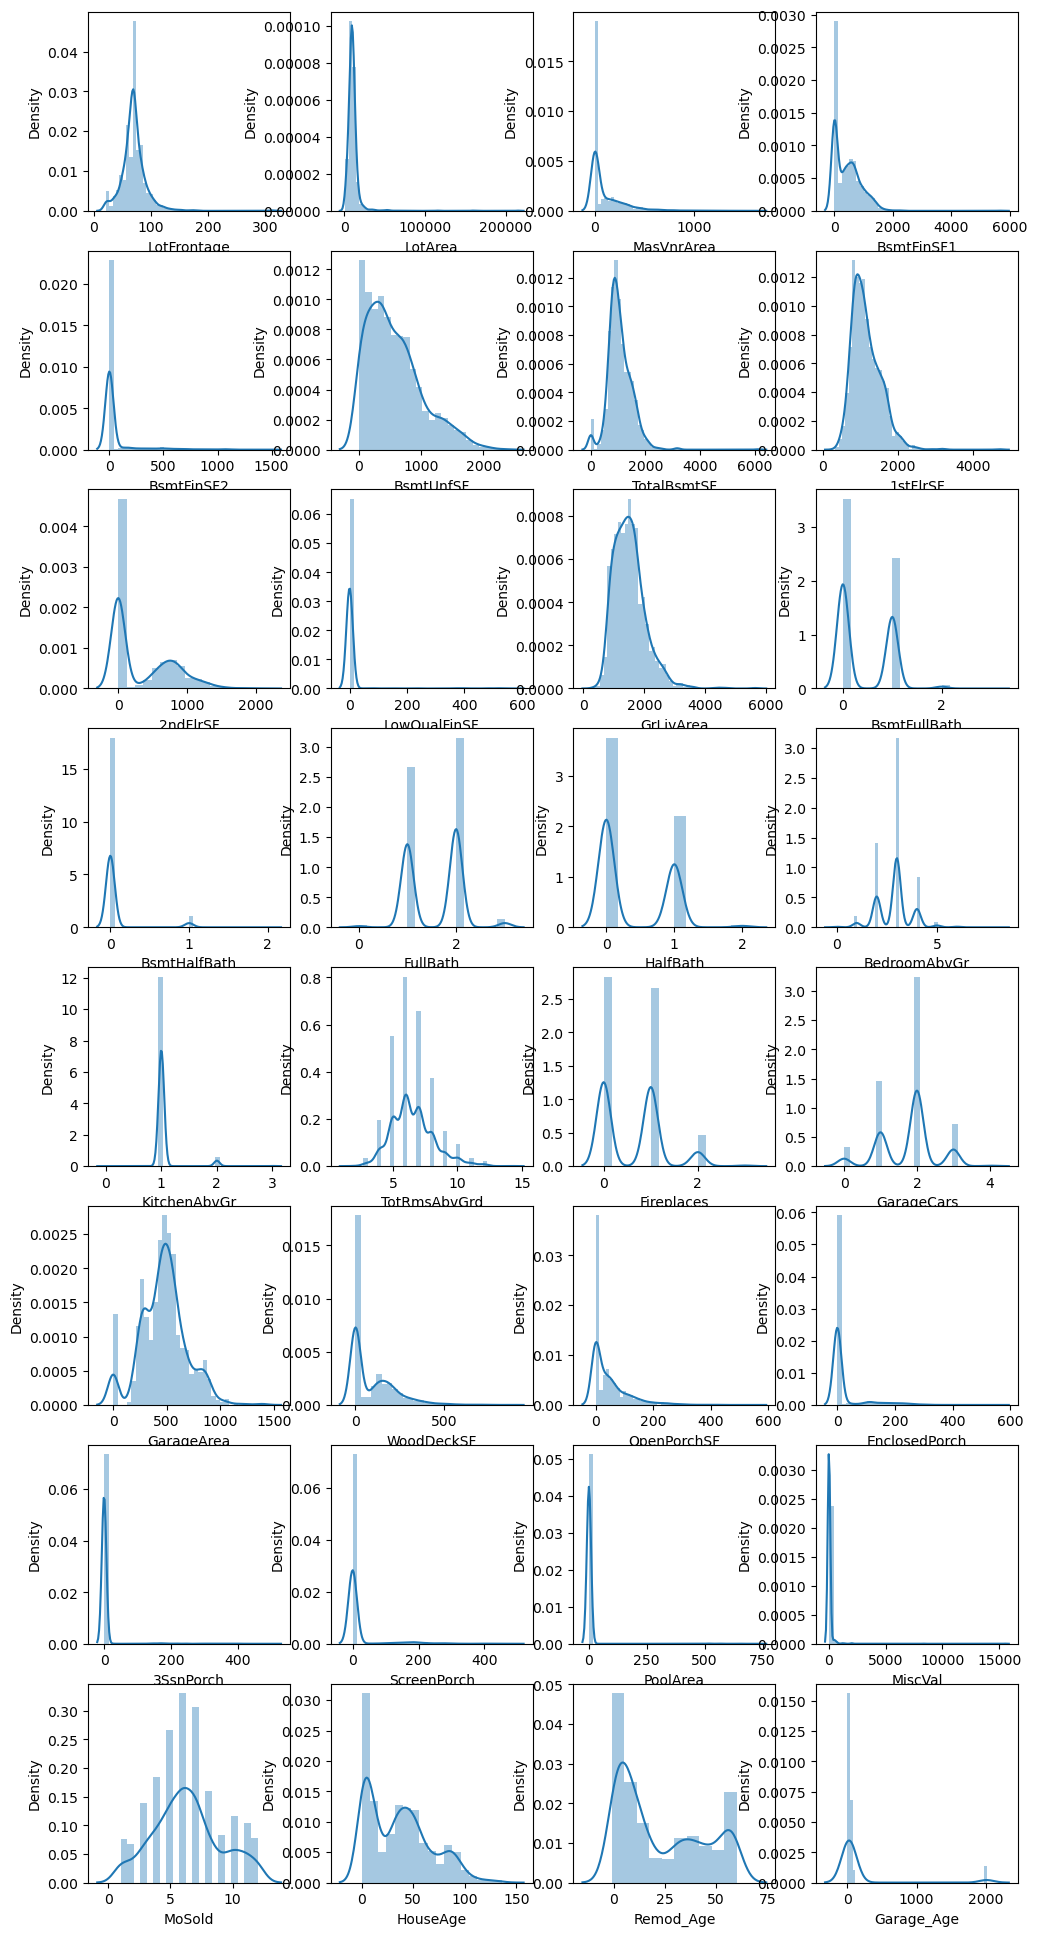

In [105]:
num_var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'Remod_Age', 'Garage_Age']
plt.figure(figsize=(12,24))
for i, v in enumerate (num_var):
    plt.subplot(9,4,i+1)
    sns.distplot(data1[v])
#    plt.title('Distribution of '+v)
    plt.xlabel(v)
#    plt.ylabel('Density')
    plt.subplots_adjust(bottom=0.001)
plt.show()

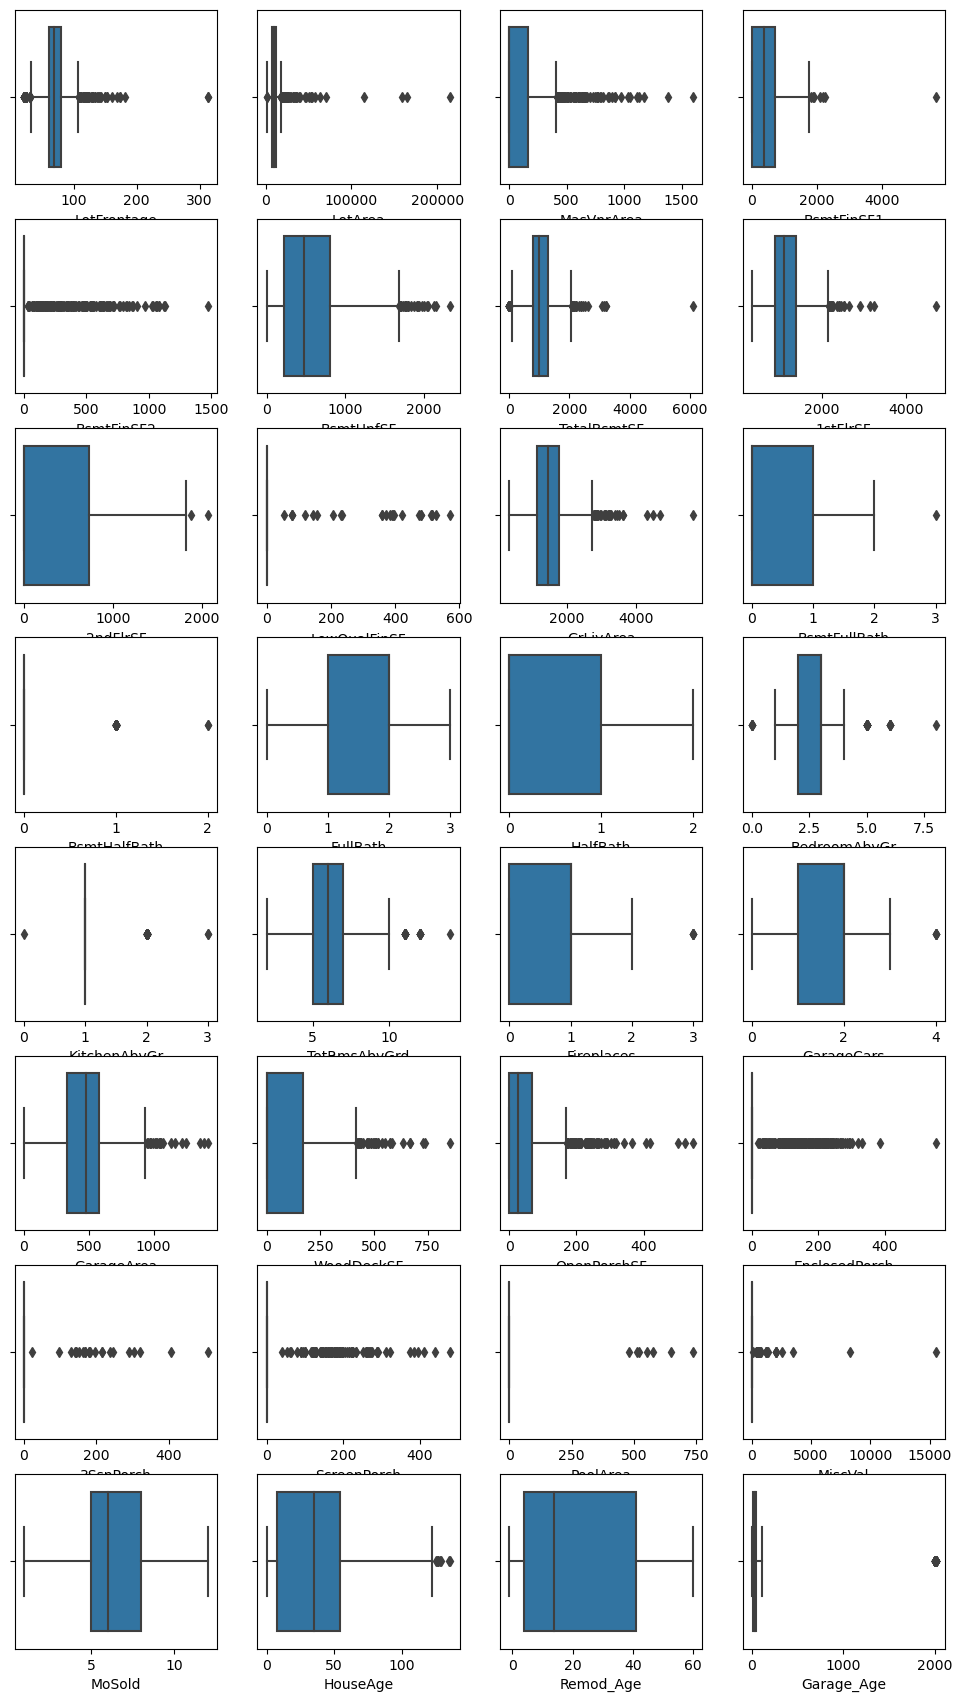

In [106]:
plt.figure(figsize=(12,24))
for i in enumerate(num_var):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(x=i[1], data=data1)

In [107]:
sel_cols_categorical = list(data1.select_dtypes(include='object').columns)
print(len(sel_cols_categorical))
print(sel_cols_categorical)

46
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


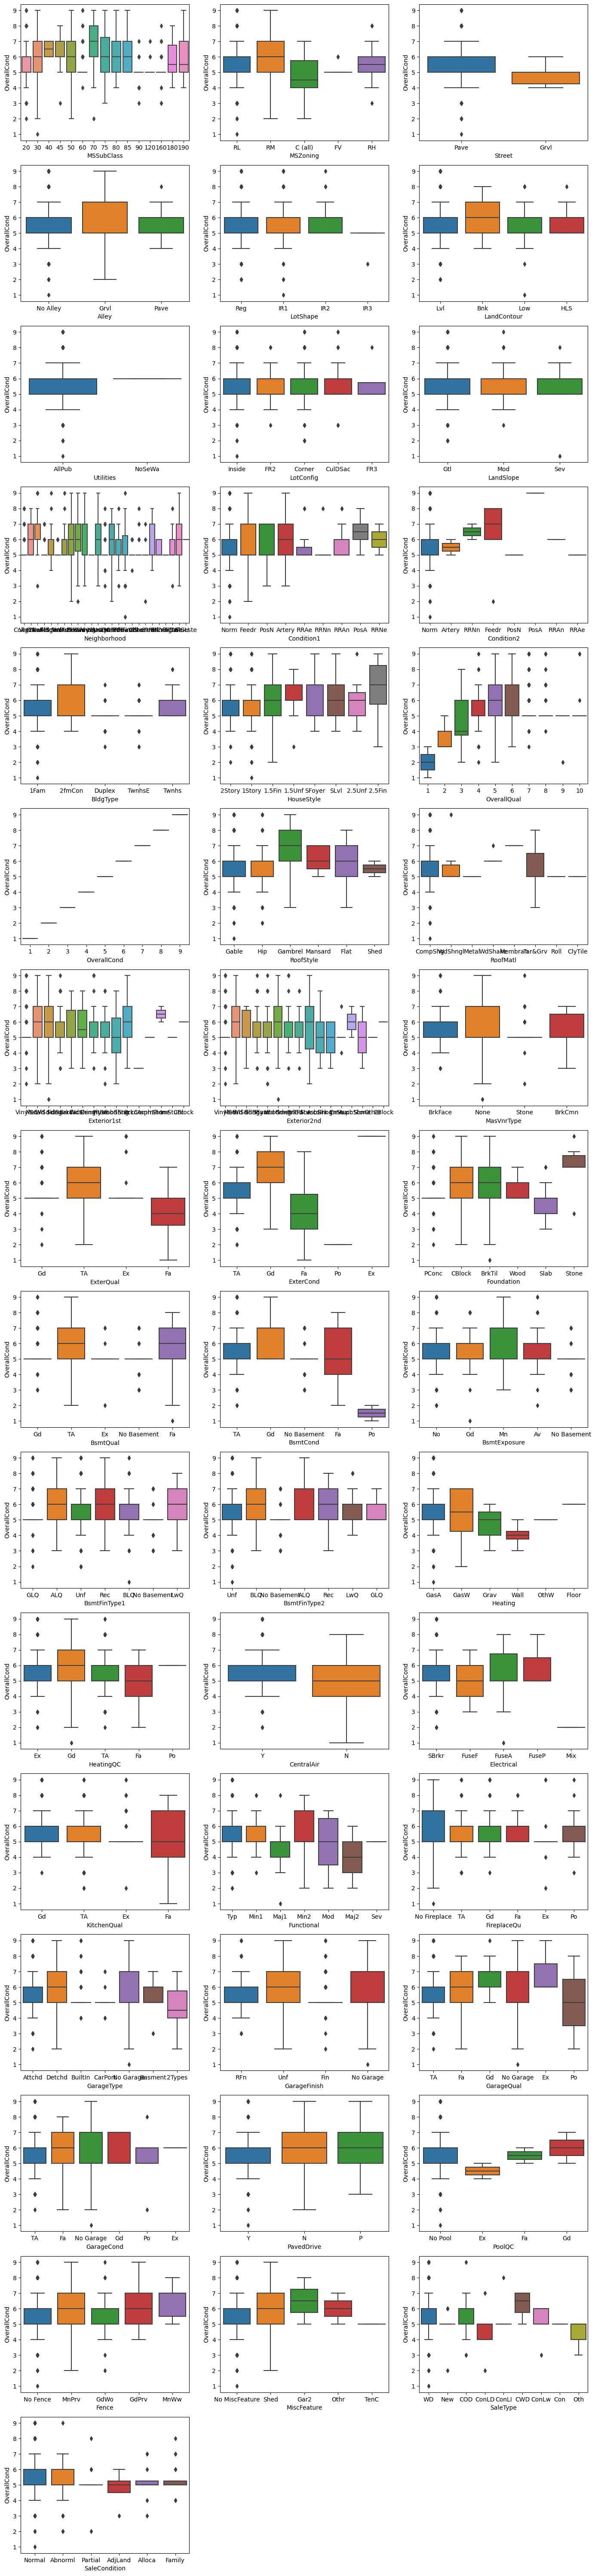

In [108]:
plt.figure(figsize=(14,60))
for i in list(enumerate(sel_cols_categorical)):
    plt.subplot(16,3,i[0]+1)
    sns.boxplot(x = i[1], y = 'OverallCond', data = data1)
plt.tight_layout(pad = 1)    
plt.show()

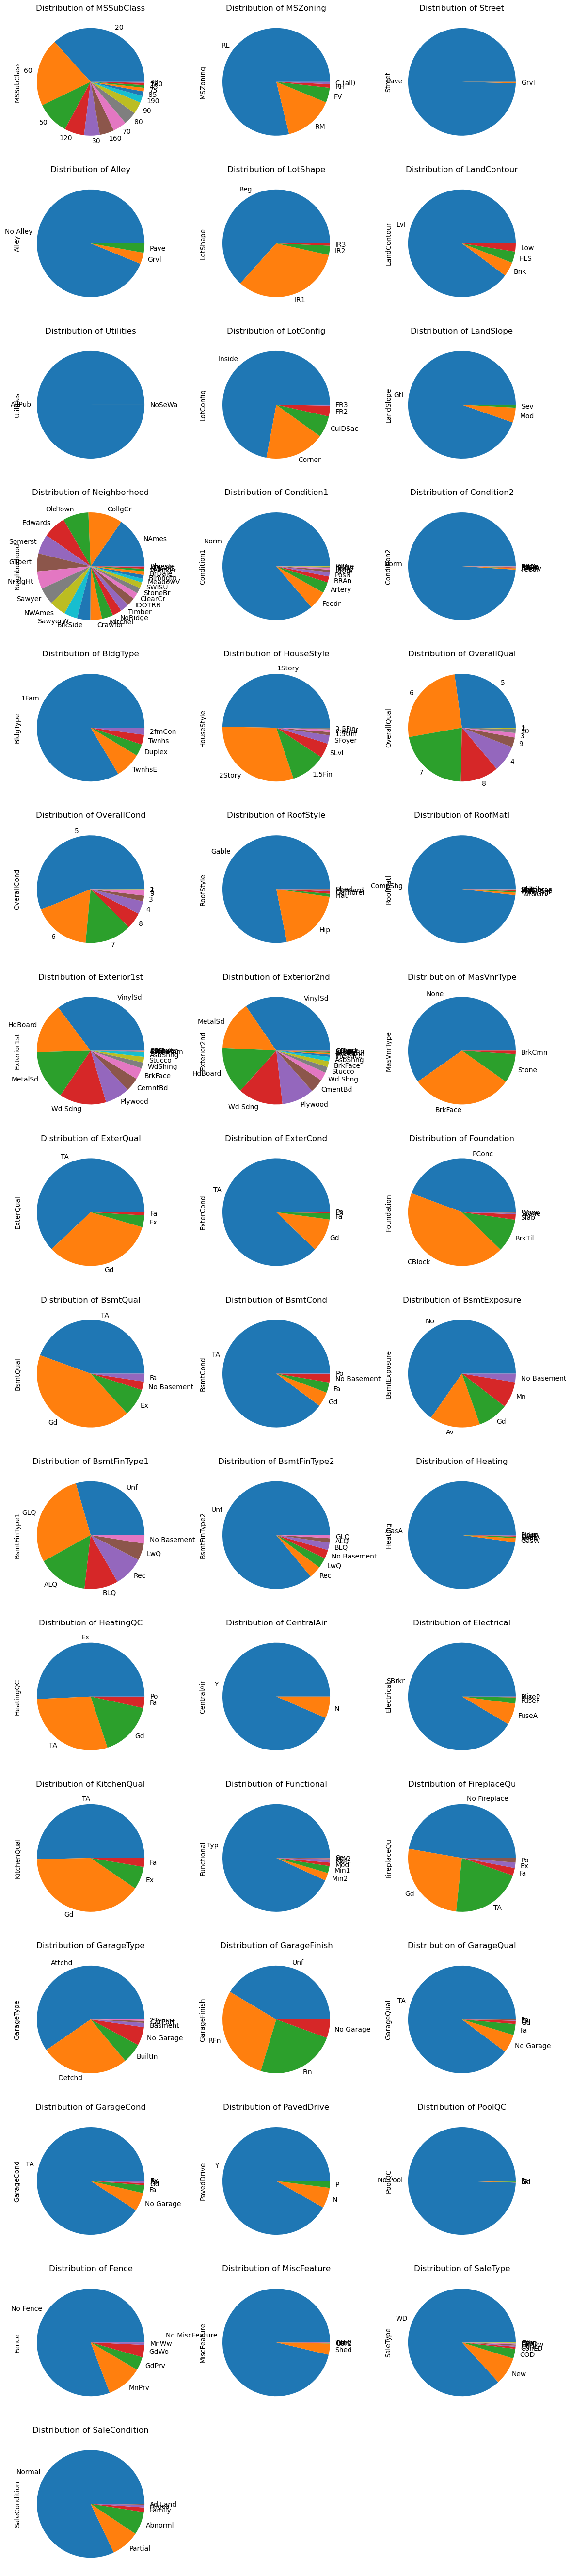

In [109]:
#checking distribution of categorical variables using pie plots
plt.figure(figsize=(14,60))
for i,v in enumerate(sel_cols_categorical):
    plt.subplot(16,3,i+1)
    data1[v].value_counts().plot.pie()
#    sns.distplot(data[v])
    plt.title('Distribution of ' + v)
#    plt.xlabel(v)
#    plt.ylabel('Density')
    plt.subplots_adjust(bottom = 0.001)
plt.show()

# Bi-Variant Analysis

<Figure size 1800x1400 with 0 Axes>

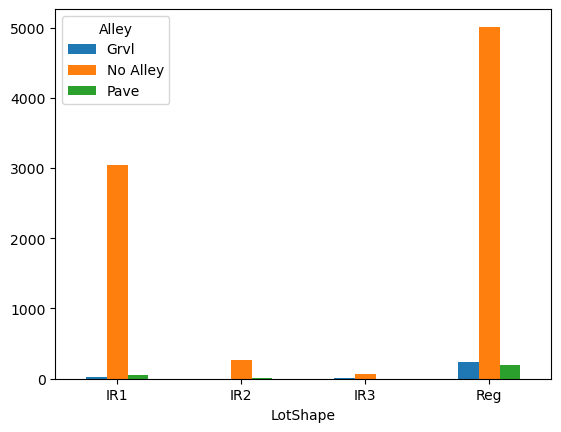

In [111]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data1, values="OverallQual", index="LotShape", columns="Alley",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

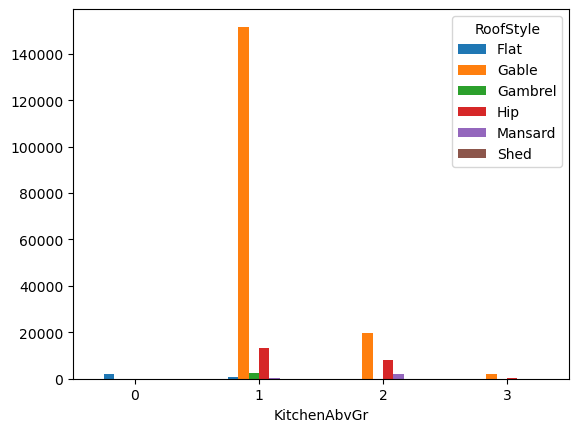

In [112]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data1, values="Garage_Age", index="KitchenAbvGr", columns="RoofStyle",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

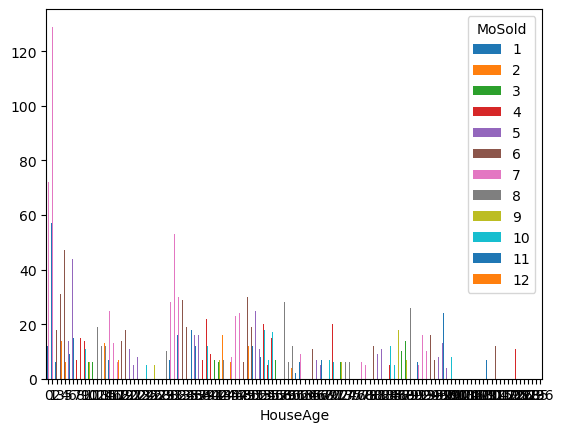

In [113]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data1, values="TotRmsAbvGrd", index="HouseAge", columns="MoSold",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

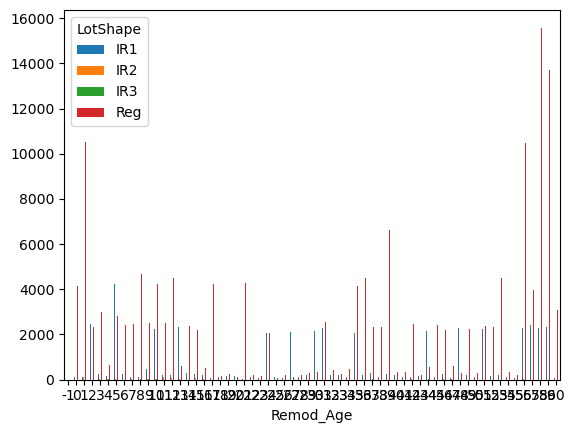

In [114]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data1, values="Garage_Age", index="Remod_Age", columns="LotShape",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# Dummy Variable creation for categorical features

In [115]:
for i in list(sel_cols_categorical):
    print(data[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor    

### MSSubClass

In [116]:
data1['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [117]:
data1 = data1.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',30:'Other1',70:'Other1',
                               80:'Other1',160:'Other1',120:'Other1'}})

In [118]:
# Creating dummy variable
msbcls = pd.get_dummies(data1['MSSubClass'], prefix = 'MSSubClass')
msbcls.head(2)

,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_Other,MSSubClass_Other1
0,0,0,1,0,0
1,1,0,0,0,0


In [119]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#msbcls = msbcls.drop('MSSubClass_Other', axis=1)
data1 = pd.concat([data1, msbcls], axis=1)
data1 = data1.drop('MSSubClass', axis=1)
data1[['MSSubClass_20','MSSubClass_20','MSSubClass_60','MSSubClass_Other','MSSubClass_Other1']].head(2)

,MSSubClass_20,MSSubClass_20,MSSubClass_60,MSSubClass_Other,MSSubClass_Other1
0,0,0,1,0,0
1,1,1,0,0,0


### MSZoning

In [120]:
data1.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [121]:
data1 = data1.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other','FV':'Other'}})

In [122]:
# Creating dummy variable
msz = pd.get_dummies(data1['MSZoning'], prefix = 'MSZoning')
msz.head(2)

,MSZoning_Other,MSZoning_RL,MSZoning_RM
0,0,1,0
1,0,1,0


In [123]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
#msz = msz.drop('MSZoning_Other', axis=1)
data1 = pd.concat([data1, msz], axis=1)
data1 = data1.drop('MSZoning', axis=1)
data1[['MSZoning_RL', 'MSZoning_RM', 'MSZoning_Other']].head(2)

,MSZoning_RL,MSZoning_RM,MSZoning_Other
0,1,0,0
1,1,0,0


### Street

In [124]:
data1.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [125]:
# Creating dummy variable
strt = pd.get_dummies(data1['Street'], prefix = 'Street')
strt.head(2)

,Street_Grvl,Street_Pave
0,0,1
1,0,1


In [126]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
strt = strt.drop('Street_Grvl', axis=1)
data1 = pd.concat([data1, strt], axis=1)
data1 = data1.drop('Street', axis=1)
data1[['Street_Pave']].head(2)

,Street_Pave
0,1
1,1


### Alley

In [127]:
data1.Alley.value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [128]:
data1 = data1.replace({'Alley': {'Grvl':'Other', 'Pave':'Other'}})

In [129]:
# Creating dummy variable
ally = pd.get_dummies(data1['Alley'], prefix = 'Alley')
ally.head(2)

,Alley_No Alley,Alley_Other
0,1,0
1,1,0


In [130]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
ally = ally.drop('Alley_Other', axis=1)
data1 = pd.concat([data1, ally], axis=1)
data1 = data1.drop('Alley', axis=1)
data1[['Alley_No Alley']].head(2)

,Alley_No Alley
0,1
1,1


### LotShape

In [131]:
data1.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [132]:
data1 = data1.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})

In [133]:
# Creating dummy variable
ltshp = pd.get_dummies(data1['LotShape'], prefix = 'LotShape')
ltshp.head(2)

,LotShape_IR1,LotShape_Other,LotShape_Reg
0,0,0,1
1,0,0,1


In [134]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
ltshp = ltshp.drop('LotShape_Other', axis=1)
data1 = pd.concat([data1, ltshp], axis=1)
data1 = data1.drop('LotShape', axis=1)
data1[['LotShape_IR1','LotShape_Reg']].head(2)

,LotShape_IR1,LotShape_Reg
0,0,1
1,0,1


### LandContour

In [135]:
data1.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [136]:
data1 = data1.replace({'LandContour': {'Bnk':'Other', 'HLS':'Other', 'Low':'Other'}})

In [137]:
# Creating dummy variable
lndcnt = pd.get_dummies(data1['LandContour'], prefix = 'LandContour')
lndcnt.head(2)

,LandContour_Lvl,LandContour_Other
0,1,0
1,1,0


In [138]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
#lndcnt = lndcnt.drop(['LandContour_Bnk','LandContour_HLS','LandContour_Low'], axis=1)
data1 = pd.concat([data1, lndcnt], axis=1)
data1 = data1.drop('LandContour', axis=1)
data1[['LandContour_Other','LandContour_Lvl']].head(2)

,LandContour_Other,LandContour_Lvl
0,0,1
1,0,1


### Utilities

In [139]:
data1.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [140]:
# Creating dummy variable
utlts = pd.get_dummies(data1['Utilities'], prefix = 'Utilities')
utlts.head(2)

,Utilities_AllPub,Utilities_NoSeWa
0,1,0
1,1,0


In [141]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
utlts = utlts.drop('Utilities_NoSeWa', axis=1)
data1 = pd.concat([data1, utlts], axis=1)
data1 = data1.drop('Utilities', axis=1)
data1['Utilities_AllPub'].head(2)

0    1
1    1
Name: Utilities_AllPub, dtype: uint8

### LotConfig

In [142]:
data1['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [143]:
data1 = data1.replace({'LotConfig': {'CulDSac':'Other','FR2':'Other', 'FR3':'Other'}})

In [144]:
# Creating dummy variable
ltc = pd.get_dummies(data1['LotConfig'], prefix = 'LotConfig')
ltc.head(2)

,LotConfig_Corner,LotConfig_Inside,LotConfig_Other
0,0,1,0
1,0,0,1


In [145]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#ltc = ltc.drop('LotConfig_Other', axis=1)
data1 = pd.concat([data1, ltc], axis=1)
data1 = data1.drop('LotConfig', axis=1)
data1[['LotConfig_Corner','LotConfig_Inside','LotConfig_Other']].head(2)

,LotConfig_Corner,LotConfig_Inside,LotConfig_Other
0,0,1,0
1,0,0,1


### LandSlope

In [146]:
data1.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [147]:
# Creating dummy variable
lndslp = pd.get_dummies(data1['LandSlope'], prefix = 'LandSlope')
lndslp.head(2)

,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,1,0,0
1,1,0,0


In [148]:
# Dropping MSZoning_Other column, Adding result to master data1 and dropping original columns
lndslp = lndslp.drop(['LandSlope_Mod','LandSlope_Sev'], axis=1)
data1 = pd.concat([data1, lndslp], axis=1)
data1 = data1.drop('LandSlope', axis=1)
data1['LandSlope_Gtl'].head(2)

0    1
1    1
Name: LandSlope_Gtl, dtype: uint8

### Neighborhood

In [149]:
data1['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [150]:
data1 = data1.replace({'Neighborhood': {'NAmes':'Tier1', 'CollgCr':'Tier1', 'OldTown':'Tier1','Somerst':'Tier2','Gilbert':'Tier2','NridgHt':'Tier2','NWAmes':'Tier2','Edwards':'Tier2','Sawyer':'Tier2','SawyerW':'Tier3','Crawfor':'Tier2','BrkSide':'Tier2','Mitchel':'Tier2', 'NoRidge':'Tier2', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other','MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other','IDOTRR':'Other', 'Timber':'Other','Blueste':'Other'}})

In [151]:
# Creating dummy variable
neigh = pd.get_dummies(data1['Neighborhood'], prefix = 'Neighborhood')
neigh.head(2)

,Neighborhood_Other,Neighborhood_Tier1,Neighborhood_Tier2,Neighborhood_Tier3
0,0,1,0,0
1,1,0,0,0


In [152]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#neigh = neigh.drop('Neighborhood_Other', axis=1)
data1 = pd.concat([data1, neigh], axis=1)
data1 = data1.drop('Neighborhood', axis=1)
data1[['Neighborhood_Other','Neighborhood_Tier1','Neighborhood_Tier2','Neighborhood_Tier3']].head(2)

,Neighborhood_Other,Neighborhood_Tier1,Neighborhood_Tier2,Neighborhood_Tier3
0,0,1,0,0
1,1,0,0,0


### Condition1

In [153]:
data1['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [154]:
data1 = data1.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other','Artery':'Other', 'Feedr':'Other',}})

In [155]:
# Creating dummy variable
cond1 = pd.get_dummies(data1['Condition1'], prefix = 'Condition1')
cond1.head(2)

,Condition1_Norm,Condition1_Other
0,1,0
1,0,1


In [156]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#cond1 = cond1.drop('Condition1_Other', axis=1)
data1 = pd.concat([data1, cond1], axis=1)
data1 = data1.drop('Condition1', axis=1)
data1[['Condition1_Norm','Condition1_Other']].head(2)

,Condition1_Norm,Condition1_Other
0,1,0
1,0,1


### Condition2

In [157]:
data1.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [158]:
data1 = data1.replace({'Condition2': {'Feedr':'Other', 'Artery':'Other','RRNn':'Other','PosN':'Other','PosA':'Other','RRAn':'Other','RRAe':'Other'}})

In [159]:
# Creating dummy variable
cndt2 = pd.get_dummies(data1['Condition2'], prefix = 'Condition2')
cndt2.head(2)

,Condition2_Norm,Condition2_Other
0,1,0
1,1,0


In [160]:
cndt2 = cndt2.drop('Condition2_Other', axis=1)
data1 = pd.concat([data1, cndt2], axis=1)
data1 = data1.drop('Condition2', axis=1)
data1['Condition2_Norm'].head(2)

0    1
1    1
Name: Condition2_Norm, dtype: uint8

### BldgType

In [161]:
data1.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [162]:
data1 = data1.replace({'BldgType': {'TwnhsE':'Other','Twnhs':'Other','Duplex':'Other','2fmCon':'Other'}})

In [163]:
# Creating dummy variable
bldtyp = pd.get_dummies(data1['BldgType'], prefix = 'BldgType')
bldtyp.head(2)

,BldgType_1Fam,BldgType_Other
0,1,0
1,1,0


In [164]:
data1 = pd.concat([data1, bldtyp], axis=1)
data1 = data1.drop('BldgType', axis=1)
data1[['BldgType_1Fam', 'BldgType_Other']].head(2)

,BldgType_1Fam,BldgType_Other
0,1,0
1,1,0


### HouseStyle

In [165]:
data1['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [166]:
data1 = data1.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})                               

In [167]:
# Creating dummy variable
housstly = pd.get_dummies(data1['HouseStyle'], prefix = 'HouseStyle')
housstly.head(2)

,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other
0,0,0,1,0
1,0,1,0,0


In [168]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#housstly = housstly.drop('HouseStyle_Other', axis=1)
data1 = pd.concat([data1, housstly], axis=1)
data1 = data1.drop('HouseStyle', axis=1)
data1[['HouseStyle_1.5Fin','HouseStyle_1Story','HouseStyle_2Story','HouseStyle_Other']].head(2)

,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other
0,0,0,1,0
1,0,1,0,0


### OverallQual

In [169]:
data1['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [170]:
data1 = data1.replace({'OverallQual': {2:'Other', 1:'Other'}}) 

In [171]:
# Creating dummy variable
Ovrqul = pd.get_dummies(data1['OverallQual'], prefix = 'OverallQual')
Ovrqul.head(2)

,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallQual_Other
0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0


In [172]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#Ovrqul = Ovrqul.drop('OverallQual_Other', axis=1)
data1 = pd.concat([data1, Ovrqul], axis=1)
data1 = data1.drop('OverallQual', axis=1)
data1[['OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallQual_10','OverallQual_Other']].head(2)

,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallQual_Other
0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0


### OverallCond

In [173]:
data1['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [174]:
data1 = data1.replace({'OverallCond': {2:'Other', 1:'Other'}}) 

In [175]:
# Creating dummy variable
Ovrcnd = pd.get_dummies(data1['OverallCond'], prefix = 'OverallCond')
Ovrcnd.head(2)

,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Other
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0


In [176]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#Ovrqul = Ovrqul.drop('OverallQual_Other', axis=1)
data1 = pd.concat([data1, Ovrcnd], axis=1)
data1 = data1.drop('OverallCond', axis=1)
data1[['OverallCond_3','OverallCond_4','OverallCond_5','OverallCond_6','OverallCond_7','OverallCond_8','OverallCond_9','OverallCond_Other']].head(2)

,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Other
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0


### RoofStyle

In [177]:
data1['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [178]:
data1 = data1.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})

In [179]:
# Creating dummy variable
roofstl = pd.get_dummies(data1['RoofStyle'], prefix = 'RoofStyle')
roofstl.head(2)

,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other
0,1,0,0
1,1,0,0


In [180]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#roofstl = roofstl.drop('RoofStyle_Other', axis=1)
data1 = pd.concat([data1, roofstl], axis=1)
data1 = data1.drop('RoofStyle', axis=1)
data1[['RoofStyle_Other','RoofStyle_Gable','RoofStyle_Hip']].head(2)

,RoofStyle_Other,RoofStyle_Gable,RoofStyle_Hip
0,0,1,0
1,0,1,0


### RoofMatl

In [181]:
data1.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [182]:
data1 = data1.replace({'RoofMatl': {'Tar&Grv':'Other', 'WdShngl':'Other','WdShake':'Other','Metal':'Other','Membran':'Other','Roll':'Other','ClyTile':'Other'}})

In [183]:
# Creating dummy variable
Rofmatl = pd.get_dummies(data1['RoofMatl'], prefix = 'RoofMatl')
Rofmatl.head(2)

,RoofMatl_CompShg,RoofMatl_Other
0,1,0
1,1,0


In [184]:
Rofmatl = Rofmatl.drop('RoofMatl_Other', axis=1)
data1 = pd.concat([data1, Rofmatl], axis=1)
data1 = data1.drop('RoofMatl', axis=1)
data1['RoofMatl_CompShg'].head(2)

0    1
1    1
Name: RoofMatl_CompShg, dtype: uint8

### Exterior1st

In [185]:
data1['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [186]:
data1 = data1.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})

In [187]:
# Creating dummy variable
extr1st = pd.get_dummies(data1['Exterior1st'], prefix = 'Exterior1st')
extr1st.head(2)

,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng
0,0,0,0,0,1,0
1,0,1,0,0,0,0


In [188]:
# Dropping Exterior1st_Other column, Adding result to master data1 and dropping original columns
#extr1st = extr1st.drop('Exterior1st_Other', axis=1)
data1 = pd.concat([data1, extr1st], axis=1)
data1 = data1.drop('Exterior1st', axis=1)
data1[['Exterior1st_Other','Exterior1st_HdBoard','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_VinylSd','Exterior1st_Wd Sdng']].head(2)

,Exterior1st_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng
0,0,0,0,0,1,0
1,0,0,1,0,0,0


### Exterior2nd

In [189]:
data1['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [190]:
data1 = data1.replace({'Exterior2nd': {'CBlock':'Other','Other':'Other','Stone':'Other', 'AsphShn':'Other','Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})

In [191]:
# Creating dummy variable
extr2nd = pd.get_dummies(data1['Exterior2nd'], prefix = 'Exterior2nd')
extr2nd.head(2)

,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng
0,0,0,0,0,1,0
1,0,1,0,0,0,0


In [192]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#extr2nd = extr2nd.drop('Exterior2nd_Other', axis=1)
data1 = pd.concat([data1, extr2nd], axis=1)
data1 = data1.drop('Exterior2nd', axis=1)
data1[['Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng']].head(2)

,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng
0,0,0,0,0,1,0
1,0,1,0,0,0,0


### MasVnrType

In [193]:
data1['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [194]:
# Creating dummy variable
msvdtyp = pd.get_dummies(data1['MasVnrType'], prefix = 'MasVnrType')
msvdtyp.head(2)

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,1,0,0
1,0,0,1,0


In [195]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#extr2nd = extr2nd.drop('Exterior2nd_Other', axis=1)
data1 = pd.concat([data1, msvdtyp], axis=1)
data1 = data1.drop('MasVnrType', axis=1)
data1[['MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone']].head(2)

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,1,0,0
1,0,0,1,0


### ExterQual

In [196]:
data1['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [197]:
data1 = data1.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})

In [198]:
# Creating dummy variable
extql = pd.get_dummies(data1['ExterQual'], prefix = 'ExterQual')
extql.head(2)

,ExterQual_Gd,ExterQual_Other,ExterQual_TA
0,1,0,0
1,0,0,1


In [199]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
extql = extql.drop('ExterQual_Other', axis=1)
data1 = pd.concat([data1, extql], axis=1)
data1 = data1.drop('ExterQual', axis=1)
data1[['ExterQual_Gd','ExterQual_TA']].head(2)

,ExterQual_Gd,ExterQual_TA
0,1,0
1,0,1


### ExterCond

In [200]:
data1.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [201]:
data1 = data1.replace({'ExterCond': {'Gd':'Other','Fa':'Other', 'Ex':'Other'}})

In [202]:
# Creating dummy variable
extcnd = pd.get_dummies(data1['ExterCond'], prefix = 'ExterCond')
extcnd.head(2)

,ExterCond_Other,ExterCond_Po,ExterCond_TA
0,0,0,1
1,0,0,1


In [203]:
#extcnd = extcnd.drop('ExterCond_Other', axis=1)
data1 = pd.concat([data1, extcnd], axis=1)
data1 = data1.drop('ExterCond', axis=1)
data1[['ExterCond_Other','ExterCond_TA']].head(2)

,ExterCond_Other,ExterCond_TA
0,0,1
1,0,1


### Foundation

In [204]:
data1['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [205]:
data1 = data1.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','BrkTil':'Other'}})

In [206]:
# Creating dummy variable
foundtn = pd.get_dummies(data1['Foundation'], prefix = 'Foundation')
foundtn.head(2)

,Foundation_CBlock,Foundation_Other,Foundation_PConc,Foundation_Slab
0,0,0,1,0
1,1,0,0,0


In [207]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#foundtn = foundtn.drop('Foundation_Other', axis=1)
data1 = pd.concat([data1, foundtn], axis=1)
data1 = data1.drop('Foundation', axis=1)
data1[['Foundation_CBlock','Foundation_Other', 'Foundation_PConc']].head(2)

,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,0,0,1
1,1,0,0


### BsmtQual

In [208]:
data1['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [209]:
data1 = data1.replace({'BsmtQual': {'Fa':'Other', 'Ex':'Other'}})

In [210]:
# Creating dummy variable
bstql = pd.get_dummies(data1['BsmtQual'], prefix = 'BsmtQual')
bstql.head(2)

,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_Other,BsmtQual_TA
0,1,0,0,0
1,1,0,0,0


In [211]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#bstql = bstql.drop('BsmtQual_Other', axis=1)
data1 = pd.concat([data1, bstql], axis=1)
data1 = data1.drop('BsmtQual', axis=1)
data1[['BsmtQual_Gd','BsmtQual_Other','BsmtQual_TA']].head(2)

,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA
0,1,0,0
1,1,0,0


### BsmtCond

In [212]:
data1.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [213]:
data1 = data1.replace({'BsmtCond': {'Gd':'Other','Fa':'Other','Po':'Other'}})

In [214]:
# Creating dummy variable
bstcnd = pd.get_dummies(data1['BsmtCond'], prefix = 'BsmtCond')
bstcnd.head(2)

,BsmtCond_No Basement,BsmtCond_Other,BsmtCond_TA
0,0,0,1
1,0,0,1


In [215]:
bstcnd = bstcnd.drop('BsmtCond_Other', axis=1)
data1 = pd.concat([data1, bstcnd], axis=1)
data1 = data1.drop('BsmtCond', axis=1)
data1['BsmtCond_TA'].head(2)

0    1
1    1
Name: BsmtCond_TA, dtype: uint8

### BsmtExposure

In [216]:
data1['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [217]:
data1 = data1.replace({'BsmtExposure': {'Gd':'Other', 'Mn':'Other'}})

In [218]:
# Creating dummy variable
bstexp = pd.get_dummies(data1['BsmtExposure'], prefix = 'BsmtExposure')
bstexp.head(2)

,BsmtExposure_Av,BsmtExposure_No,BsmtExposure_No Basement,BsmtExposure_Other
0,0,1,0,0
1,0,0,0,1


In [219]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#bstexp = bstexp.drop('BsmtExposure_No', axis=1)
data1 = pd.concat([data1, bstexp], axis=1)
data1 = data1.drop('BsmtExposure', axis=1)
data1[['BsmtExposure_Av','BsmtExposure_No','BsmtExposure_Other']].head(2)

,BsmtExposure_Av,BsmtExposure_No,BsmtExposure_Other
0,0,1,0
1,0,0,1


### BsmtFinType1

In [220]:
data1['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [221]:
data1 = data1.replace({'BsmtFinType1': {'BLQ':'Other', 'Rec':'Other', 'LwQ':'Other'}})

In [222]:
# Creating dummy variable
bstftp1 = pd.get_dummies(data1['BsmtFinType1'], prefix = 'BsmtFinType1')
bstftp1.head(2)

,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_No Basement,BsmtFinType1_Other,BsmtFinType1_Unf
0,0,1,0,0,0
1,1,0,0,0,0


In [223]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#bstftp1 = bstftp1.drop('BsmtFinType1_Unf', axis=1)
data1 = pd.concat([data1, bstftp1], axis=1)
data1 = data1.drop('BsmtFinType1', axis=1)
data1[['BsmtFinType1_ALQ','BsmtFinType1_GLQ','BsmtFinType1_Other','BsmtFinType1_Unf']].head(2)

,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Other,BsmtFinType1_Unf
0,0,1,0,0
1,1,0,0,0


### BsmtFinType2

In [224]:
data1.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [225]:
data1 = data1.replace({'BsmtFinType2': {'Rec':'Other', 'LwQ':'Other','BLQ':'Other','ALQ':'Other', 'GLQ':'Other','No Basement':'Other'}})

In [226]:
# Creating dummy variable
bstftyp2 = pd.get_dummies(data1['BsmtFinType2'], prefix = 'BsmtFinType2')
bstftyp2.head(2)

,BsmtFinType2_Other,BsmtFinType2_Unf
0,0,1
1,0,1


In [227]:
#bstftyp2 = bstftyp2.drop('BsmtFinType2_Other', axis=1)
data1 = pd.concat([data1, bstftyp2], axis=1)
data1 = data1.drop('BsmtFinType2', axis=1)
data1[['BsmtFinType2_Unf','BsmtFinType2_Other']].head(2)

,BsmtFinType2_Unf,BsmtFinType2_Other
0,1,0
1,1,0


### Heating

In [228]:
data1.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [229]:
data1 = data1.replace({'Heating': {'GasW':'Other', 'Grav':'Other','OthW':'Other'}})

In [230]:
# Creating dummy variable
htng = pd.get_dummies(data1['Heating'], prefix = 'Heating')
htng.head(2)

,Heating_Floor,Heating_GasA,Heating_Other,Heating_Wall
0,0,1,0,0
1,0,1,0,0


In [231]:
htng = htng.drop('Heating_Other', axis=1)
data1 = pd.concat([data1, htng], axis=1)
data1 = data1.drop('Heating', axis=1)
data1['Heating_GasA'].head(2)

0    1
1    1
Name: Heating_GasA, dtype: uint8

### HeatingQC

In [232]:
data1['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [233]:
data1 = data1.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})

In [234]:
# Creating dummy variable
htngqc = pd.get_dummies(data1['HeatingQC'], prefix = 'HeatingQC')
htngqc.head(2)

,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA
0,1,0,0,0
1,1,0,0,0


In [235]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
htngqc = htngqc.drop('HeatingQC_Other', axis=1)
data1 = pd.concat([data1, htngqc], axis=1)
data1 = data1.drop('HeatingQC', axis=1)
data1[['HeatingQC_Ex','HeatingQC_TA','HeatingQC_Gd']].head(2)

,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd
0,1,0,0
1,1,0,0


### CentralAir

In [236]:
#data1 = data1.replace({'CentralAir': {'GasW':'Other', 'Grav':'Other','OthW':'Other'}})
data1.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [237]:
# Creating dummy variable
cntar = pd.get_dummies(data1['CentralAir'], prefix = 'CentralAir')
cntar.head(2)

,CentralAir_N,CentralAir_Y
0,0,1
1,0,1


In [238]:
cntar = cntar.drop('CentralAir_N', axis=1)
data1 = pd.concat([data1, cntar], axis=1)
data1 = data1.drop('CentralAir', axis=1)
data1['CentralAir_Y'].head(2)

0    1
1    1
Name: CentralAir_Y, dtype: uint8

### Electrical

In [239]:
data1.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [240]:
data1 = data1.replace({'Electrical': {'FuseA':'Other','FuseF':'Other','FuseP':'Other','Mix':'Other'}})

In [241]:
# Creating dummy variable
electrl = pd.get_dummies(data1['Electrical'], prefix = 'Electrical')
electrl.head(2)

,Electrical_Other,Electrical_SBrkr
0,0,1
1,0,1


In [242]:
electrl = electrl.drop('Electrical_Other', axis=1)
data1 = pd.concat([data1, electrl], axis=1)
data1 = data1.drop('Electrical', axis=1)
data1['Electrical_SBrkr'].head(2)

0    1
1    1
Name: Electrical_SBrkr, dtype: uint8

### KitchenQual

In [243]:
data1['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [244]:
data1 = data1.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})

In [245]:
# Creating dummy variable
ktcql = pd.get_dummies(data1['KitchenQual'], prefix = 'KitchenQual')
ktcql.head(2)

,KitchenQual_Gd,KitchenQual_Other,KitchenQual_TA
0,1,0,0
1,0,0,1


In [246]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#ktcql = ktcql.drop('KitchenQual_Other', axis=1)
data1 = pd.concat([data1, ktcql], axis=1)
data1 = data1.drop('KitchenQual', axis=1)
data1[['KitchenQual_Other', 'KitchenQual_Gd','KitchenQual_TA']].head(2)

,KitchenQual_Other,KitchenQual_Gd,KitchenQual_TA
0,0,1,0
1,0,0,1


### Functional

In [247]:
data1.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [248]:
data1 = data1.replace({'Functional': {'Min2':'Other','Min1':'Other','Mod':'Other','Maj1':'Other','Maj2':'Other','Sev':'Other'}})

In [249]:
# Creating dummy variable
functl = pd.get_dummies(data1['Functional'], prefix = 'Functional')
functl.head(2)

,Functional_Other,Functional_Typ
0,0,1
1,0,1


In [250]:
functl = functl.drop('Functional_Other', axis=1)
data1 = pd.concat([data1, functl], axis=1)
data1 = data1.drop('Functional', axis=1)
data1['Functional_Typ'].head(2)

0    1
1    1
Name: Functional_Typ, dtype: uint8

### FireplaceQu

In [251]:
data1.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [252]:
data1 = data1.replace({'FireplaceQu': {'Po':'Other','Ex':'Other','Fa':'Other'}})

In [253]:
# Creating dummy variable
frplcqc = pd.get_dummies(data1['FireplaceQu'], prefix = 'FireplaceQu')
frplcqc.head(2)

,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA
0,0,1,0,0
1,0,0,0,1


In [254]:
frplcqc = frplcqc.drop('FireplaceQu_Other', axis=1)
data1 = pd.concat([data1, frplcqc], axis=1)
data1 = data1.drop('FireplaceQu', axis=1)
data1[['FireplaceQu_Gd','FireplaceQu_No Fireplace','FireplaceQu_TA']].head(2)

,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA
0,0,1,0
1,0,0,1


### GarageType

In [255]:
data1['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [256]:
data1 = data1.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other','BuiltIn':'Other'}})

In [257]:
# Creating dummy variable
grgtyp = pd.get_dummies(data1['GarageType'], prefix = 'GarageType')
grgtyp.head(2)

,GarageType_Attchd,GarageType_Detchd,GarageType_No Garage,GarageType_Other
0,1,0,0,0
1,1,0,0,0


In [258]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#grgtyp = grgtyp.drop('GarageType_Other', axis=1)
data1 = pd.concat([data1, grgtyp], axis=1)
data1 = data1.drop('GarageType', axis=1)
data1[['GarageType_Attchd','GarageType_Detchd','GarageType_Other']].head(2)

,GarageType_Attchd,GarageType_Detchd,GarageType_Other
0,1,0,0
1,1,0,0


### GarageFinish

In [259]:
data1['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [260]:
# Creating dummy variable
gargfnh = pd.get_dummies(data1['GarageFinish'], prefix = 'GarageFinish')
gargfnh.head(2)

,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0
1,0,0,1,0


In [261]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#gargfnh = gargfnh.drop('GarageFinish_Unf', axis=1)
data1 = pd.concat([data1, gargfnh], axis=1)
data1 = data1.drop('GarageFinish', axis=1)
data1[['GarageFinish_Unf','GarageFinish_Fin','GarageFinish_RFn']].head(2)

,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_RFn
0,0,0,1
1,0,0,1


### GarageQual

In [262]:
data1.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [263]:
data1 = data1.replace({'GarageQual': {'Fa':'Other','Gd':'Other','Ex':'Other','Po':'Other'}})

In [264]:
# Creating dummy variable
gargql = pd.get_dummies(data1['GarageQual'], prefix = 'GarageQual')
gargql.head(2)

,GarageQual_No Garage,GarageQual_Other,GarageQual_TA
0,0,0,1
1,0,0,1


In [265]:
gargql = gargql.drop('GarageQual_Other', axis=1)
data1 = pd.concat([data1, gargql], axis=1)
data1 = data1.drop('GarageQual', axis=1)
data1[ 'GarageQual_TA'].head(2)

0    1
1    1
Name: GarageQual_TA, dtype: uint8

### GarageCond

In [266]:
data1.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [267]:
data1 = data1.replace({'GarageCond': {'Fa':'Other','Gd':'Other','Ex':'Other','Po':'Other'}})

In [268]:
# Creating dummy variable
gargcnd = pd.get_dummies(data1['GarageCond'], prefix = 'GarageCond')
gargcnd.head(2)

,GarageCond_No Garage,GarageCond_Other,GarageCond_TA
0,0,0,1
1,0,0,1


In [269]:
gargcnd = gargcnd.drop('GarageCond_Other', axis=1)
data1 = pd.concat([data1, gargcnd], axis=1)
data1 = data1.drop('GarageCond', axis=1)
data1['GarageCond_TA'].head(2)

0    1
1    1
Name: GarageCond_TA, dtype: uint8

### PavedDrive

In [270]:
data1.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [271]:
data1 = data1.replace({'PavedDrive': {'N':'Other', 'P':'Other'}})

In [272]:
# Creating dummy variable
pavddrv = pd.get_dummies(data1['PavedDrive'], prefix = 'PavedDrive')
pavddrv.head(2)

,PavedDrive_Other,PavedDrive_Y
0,0,1
1,0,1


In [273]:
pavddrv = pavddrv.drop('PavedDrive_Other', axis=1)
data1 = pd.concat([data1, pavddrv], axis=1)
data1 = data1.drop('PavedDrive', axis=1)
data1['PavedDrive_Y'].head(2)

0    1
1    1
Name: PavedDrive_Y, dtype: uint8

### PoolQC

In [274]:
data1.PoolQC.value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [275]:
data1 = data1.replace({'PoolQC': {'Gd':'Other', 'Ex':'Other', 'Fa':'Other'}})

In [276]:
# Creating dummy variable
polqc = pd.get_dummies(data1['PoolQC'], prefix = 'PoolQC')
polqc.head(2)

,PoolQC_No Pool,PoolQC_Other
0,1,0
1,1,0


In [277]:
polqc = polqc.drop('PoolQC_Other', axis=1)
data1 = pd.concat([data1, polqc], axis=1)
data1 = data1.drop('PoolQC', axis=1)
data1['PoolQC_No Pool'].head(2)

0    1
1    1
Name: PoolQC_No Pool, dtype: uint8

### Fence

In [278]:
data1.Fence.value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [279]:
data1 = data1.replace({'Fence': {'GdPrv':'Other','GdWo':'Other', 'MnWw':'Other'}})

In [280]:
# Creating dummy variable
fnc = pd.get_dummies(data1['Fence'], prefix = 'Fence')
fnc.head(2)

,Fence_MnPrv,Fence_No Fence,Fence_Other
0,0,1,0
1,0,1,0


In [281]:
#extcnd = extcnd.drop('ExterCond_Other', axis=1)
data1 = pd.concat([data1, fnc], axis=1)
data1 = data1.drop('Fence', axis=1)
data1[['Fence_MnPrv','Fence_No Fence','Fence_Other']].head(2)

,Fence_MnPrv,Fence_No Fence,Fence_Other
0,0,1,0
1,0,1,0


### MiscFeature

In [282]:
data1.MiscFeature.value_counts()

No MiscFeature    1406
Shed                49
Gar2                 2
Othr                 2
TenC                 1
Name: MiscFeature, dtype: int64

In [283]:
data1 = data1.replace({'MiscFeature': {'Shed':'Other','Gar2':'Other', 'Othr':'Other', 'TenC':'Other'}})

In [284]:
# Creating dummy variable
misftr = pd.get_dummies(data1['MiscFeature'], prefix = 'MiscFeature')
misftr.head(2)

,MiscFeature_No MiscFeature,MiscFeature_Other
0,1,0
1,1,0


In [285]:
#extcnd = extcnd.drop('ExterCond_Other', axis=1)
data1 = pd.concat([data1, misftr], axis=1)
data1 = data1.drop('MiscFeature', axis=1)
data1['MiscFeature_No MiscFeature'].head(2)

0    1
1    1
Name: MiscFeature_No MiscFeature, dtype: uint8

### SaleType

In [286]:
data1.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [287]:
data1 = data1.replace({'SaleType': {'New':'Other','COD':'Other','ConLD':'Other', 'ConLI':'Other','CWD':'Other', 'ConLw':'Other','Con':'Other', 'Oth':'Other'}})

In [288]:
# Creating dummy variable
saltyp = pd.get_dummies(data1['SaleType'], prefix = 'SaleType')
saltyp.head(2)

,SaleType_Other,SaleType_WD
0,0,1
1,0,1


In [289]:
#saltyp = saltyp.drop('SaleType_Other', axis=1)
data1 = pd.concat([data1, saltyp], axis=1)
data1 = data1.drop('SaleType', axis=1)
data1[ ['SaleType_Other','SaleType_WD']].head(2)

,SaleType_Other,SaleType_WD
0,0,1
1,0,1


### SaleCondition

In [290]:
data1['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [291]:
data1 = data1.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other','Abnorml':'Other'}})

In [292]:
# Creating dummy variable
salcnd = pd.get_dummies(data1['SaleCondition'], prefix = 'SaleCondition')
salcnd.head(2)

,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,0,0
1,1,0,0


In [293]:
# Dropping LotConfig_Other column, Adding result to master data1 and dropping original columns
#salcnd = salcnd.drop('SaleCondition_Other', axis=1)
data1 = pd.concat([data1, salcnd], axis=1)
data1 = data1.drop('SaleCondition', axis=1)
data1[['SaleCondition_Normal', 'SaleCondition_Other','SaleCondition_Partial']].head(2)

,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,0,0
1,1,0,0


In [294]:
print(data1.shape)
data1.head()

(1460, 168)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,Remod_Age,Garage_Age,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_Other,MSSubClass_Other1,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,LotShape_IR1,LotShape_Reg,LandContour_Lvl,LandContour_Other,Utilities_AllPub,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,LandSlope_Gtl,Neighborhood_Other,Neighborhood_Tier1,Neighborhood_Tier2,Neighborhood_Tier3,Condition1_Norm,Condition1_Other,Condition2_Norm,BldgType_1Fam,BldgType_Other,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallQual_Other,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Other,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Other,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,Foundation_Slab,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_Other,BsmtQual_TA,BsmtCond_No Basement,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_No,BsmtExposure_No Basement,BsmtExposure_Other,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_No Basement,BsmtFinType1_Other,BsmtFinType1_Unf,BsmtFinType2_Other,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_Wall,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Other,KitchenQual_TA,Functional_Typ,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageType_No Garage,GarageType_Other,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No Garage,GarageQual_TA,GarageCond_No Garage,GarageCond_TA,PavedDrive_Y,PoolQC_No Pool,Fence_MnPrv,Fence_No Fence,Fence_Other,MiscFeature_No MiscFeature,MiscFeature_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,5,5,5,0,0,1,0,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,31,31,31,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,7,6,7,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,91,36,8,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,0,

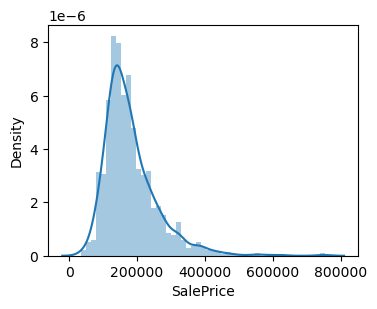

In [295]:
plt.figure(figsize=(4,3))
sns.distplot(data1['SalePrice'])
plt.show()

In [296]:
data1['SalePrice'].skew()

1.8828757597682129

# Step 2 - Preparing the data for modelling

### Test-Train Split

In [297]:
data1_train, data1_test = train_test_split(data1, train_size=0.90, test_size=0.10, random_state=100)
print(data1_train.shape)
print(data1_test.shape)
data1_train['SalePrice'].dtype

(1314, 168)
(146, 168)


dtype('int64')

### Feature Scaling

In [298]:
scaler = MinMaxScaler()

In [299]:
# Sclaing only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
num_columns = list(data1_train.select_dtypes(include=['int64', 'float64']).columns)
print(len(num_columns))
print(num_columns)
#For Training dataset
data1_train[num_columns] = scaler.fit_transform(data1_train[num_columns])
#For testing dataset
data1_test[num_columns] = scaler.transform(data1_test[num_columns]) 

34
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge', 'Remod_Age', 'Garage_Age']


In [300]:
data1_train.shape

(1314, 168)

### Create X_train and y_train

In [301]:
# Popping out the SalePrice column for y_train
y_train = data1_train.pop('SalePrice')
# Creating X_train
X_train = data1_train

# popping out the SalePrice column to create y_test
y_test = data1_test.pop('SalePrice')
# Creating X_test
X_test = data1_test

# VIF

In [302]:
X_train.shape

(1314, 167)

In [523]:
import statsmodels.api as sm
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return vif

vif = calculate_vif(X_train)

while vif["VIF"].max() > 5:
    remove_index = vif["VIF"].idxmax()
    X_train = X_train.drop(X_train.columns[remove_index], axis=1)
    vif = calculate_vif(X_train)
    print(vif)

print(X_train.head())

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      1stFlrSF          inf
8                      2ndFlrSF          inf
9                  LowQualFinSF          inf
10                    GrLivArea          inf
11                 BsmtFullBath     2.536341
12                 BsmtHalfBath     1.333516
13                     FullBath     3.529805
14                     HalfBath     2.770934
15                 BedroomAbvGr     2.961921
16                 KitchenAbvGr     3.165727
17                 TotRmsAbvGrd     5.869035
18                   Fireplaces     6.936749
19                   GarageCars     7.428527
20                   GarageArea     7.264937
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                      variables          VIF
0                            Id     1.129647
1                   LotFrontage     2.387533
2                       LotArea     1.843516
3                    MasVnrArea     2.691962
4                    BsmtFinSF2     3.629335
5                     BsmtUnfSF     4.649571
6                   TotalBsmtSF    11.608853
7                      2ndFlrSF    18.616075
8                  LowQualFinSF     1.474888
9                     GrLivArea    18.074332
10                 BsmtFullBath     2.536341
11                 BsmtHalfBath     1.333516
12                     FullBath     3.529805
13                     HalfBath     2.770934
14                 BedroomAbvGr     2.961921
15                 KitchenAbvGr     3.165727
16                 TotRmsAbvGrd     5.869035
17                   Fireplaces     6.936749
18                   GarageCars     7.428527
19                   GarageArea     7.264937
20                   WoodDeckSF     1.399057
21        

                    variables           VIF
0                          Id      1.129647
1                 LotFrontage      2.387533
2                     LotArea      1.843516
3                  MasVnrArea      2.691962
4                  BsmtFinSF2      3.629335
5                   BsmtUnfSF      4.649571
6                 TotalBsmtSF     11.608853
7                    2ndFlrSF     18.616075
8                LowQualFinSF      1.474888
9                   GrLivArea     18.074332
10               BsmtFullBath      2.536341
11               BsmtHalfBath      1.333516
12                   FullBath      3.529805
13                   HalfBath      2.770934
14               BedroomAbvGr      2.961921
15               KitchenAbvGr      3.165727
16               TotRmsAbvGrd      5.869035
17                 Fireplaces      6.936749
18                 GarageCars      7.428527
19                 GarageArea      7.264937
20                 WoodDeckSF      1.399057
21                OpenPorchSF   

                    variables          VIF
0                          Id     4.461450
1                 LotFrontage    13.708641
2                     LotArea     3.358105
3                  MasVnrArea     3.500495
4                  BsmtFinSF2     3.880051
5                   BsmtUnfSF    11.740958
6                 TotalBsmtSF    70.940059
7                    2ndFlrSF    29.960769
8                LowQualFinSF     1.479314
9                   GrLivArea    94.889879
10               BsmtFullBath     4.293850
11               BsmtHalfBath     1.385070
12                   FullBath    32.105482
13                   HalfBath     4.332177
14               BedroomAbvGr    39.756032
15               KitchenAbvGr     3.253926
16               TotRmsAbvGrd    34.692073
17                 Fireplaces    13.090592
18                 GarageCars    48.030281
19                 GarageArea    42.352732
20                 WoodDeckSF     2.180176
21                OpenPorchSF     2.176184
22         

                    variables         VIF
0                          Id    4.457279
1                 LotFrontage   13.616333
2                     LotArea    3.302167
3                  MasVnrArea    3.494471
4                  BsmtFinSF2    3.853067
5                   BsmtUnfSF   11.723506
6                 TotalBsmtSF   70.537036
7                    2ndFlrSF   29.904980
8                LowQualFinSF    1.472880
9                   GrLivArea   94.769335
10               BsmtFullBath    4.261955
11               BsmtHalfBath    1.373514
12                   FullBath   31.595980
13                   HalfBath    4.313219
14               BedroomAbvGr   39.751055
15               KitchenAbvGr    3.204018
16               TotRmsAbvGrd   34.617638
17                 Fireplaces   12.948824
18                 GarageCars   47.981276
19                 GarageArea   39.433096
20                 WoodDeckSF    2.166214
21                OpenPorchSF    2.173729
22              EnclosedPorch    1

                    variables        VIF
0                          Id   4.427075
1                 LotFrontage  13.609381
2                     LotArea   3.254656
3                  MasVnrArea   3.472293
4                  BsmtFinSF2   3.838195
5                   BsmtUnfSF  11.718071
6                 TotalBsmtSF  70.245935
7                    2ndFlrSF  29.873412
8                LowQualFinSF   1.454865
9                   GrLivArea  94.382156
10               BsmtFullBath   4.254070
11               BsmtHalfBath   1.368936
12                   FullBath  31.384303
13                   HalfBath   4.293161
14               BedroomAbvGr  39.642043
15               KitchenAbvGr   3.179918
16               TotRmsAbvGrd  34.511953
17                 Fireplaces  12.873835
18                 GarageCars  47.929361
19                 GarageArea  39.374315
20                 WoodDeckSF   2.164714
21                OpenPorchSF   2.160814
22              EnclosedPorch   1.724551
23              

                    variables        VIF
0                          Id   4.421995
1                 LotFrontage  13.593759
2                     LotArea   3.250089
3                  MasVnrArea   3.463237
4                  BsmtFinSF2   3.825745
5                   BsmtUnfSF  11.705941
6                 TotalBsmtSF  44.282390
7                    2ndFlrSF  17.878448
8                LowQualFinSF   1.342437
9                BsmtFullBath   4.248179
10               BsmtHalfBath   1.364351
11                   FullBath  29.851704
12                   HalfBath   4.222461
13               BedroomAbvGr  39.322750
14               KitchenAbvGr   3.165516
15               TotRmsAbvGrd  28.942750
16                 Fireplaces  12.818055
17                 GarageCars  47.625939
18                 GarageArea  38.960903
19                 WoodDeckSF   2.162135
20                OpenPorchSF   2.160372
21              EnclosedPorch   1.716577
22                  3SsnPorch   1.132796
23              

                    variables        VIF
0                          Id   4.397229
1                 LotFrontage  13.579327
2                     LotArea   3.176277
3                  MasVnrArea   3.354089
4                  BsmtFinSF2   3.815090
5                   BsmtUnfSF  11.674933
6                 TotalBsmtSF  44.050950
7                    2ndFlrSF  17.522181
8                LowQualFinSF   1.339781
9                BsmtFullBath   4.246337
10               BsmtHalfBath   1.362107
11                   FullBath  29.823713
12                   HalfBath   4.218304
13               BedroomAbvGr  39.176572
14               KitchenAbvGr   3.143836
15               TotRmsAbvGrd  28.865353
16                 Fireplaces  12.679641
17                 GarageCars  47.556494
18                 GarageArea  38.882660
19                 WoodDeckSF   2.155021
20                OpenPorchSF   2.155191
21              EnclosedPorch   1.715820
22                  3SsnPorch   1.132277
23              

                    variables        VIF
0                          Id   4.384746
1                 LotFrontage  13.534752
2                     LotArea   3.174929
3                  MasVnrArea   3.353837
4                  BsmtFinSF2   3.804103
5                   BsmtUnfSF  11.582386
6                 TotalBsmtSF  43.444384
7                    2ndFlrSF  17.507994
8                LowQualFinSF   1.339731
9                BsmtFullBath   4.245023
10               BsmtHalfBath   1.357077
11                   FullBath  29.637346
12                   HalfBath   4.156282
13               BedroomAbvGr  38.905394
14               KitchenAbvGr   3.137721
15               TotRmsAbvGrd  28.852342
16                 Fireplaces  12.650567
17                 GarageArea  18.251277
18                 WoodDeckSF   2.154841
19                OpenPorchSF   2.139599
20              EnclosedPorch   1.712139
21                  3SsnPorch   1.131937
22                ScreenPorch   1.234322
23              

                    variables        VIF
0                          Id   4.381974
1                 LotFrontage  13.532007
2                     LotArea   3.127232
3                  MasVnrArea   3.349489
4                  BsmtFinSF2   3.740113
5                   BsmtUnfSF  11.564235
6                 TotalBsmtSF  43.213128
7                    2ndFlrSF  16.459014
8                LowQualFinSF   1.329737
9                BsmtFullBath   4.243007
10               BsmtHalfBath   1.354854
11                   FullBath  29.426923
12                   HalfBath   4.148432
13               BedroomAbvGr  38.894722
14               KitchenAbvGr   3.115365
15               TotRmsAbvGrd  28.797875
16                 Fireplaces  12.554210
17                 GarageArea  18.192515
18                 WoodDeckSF   2.151458
19                OpenPorchSF   2.134572
20              EnclosedPorch   1.710746
21                  3SsnPorch   1.131651
22                ScreenPorch   1.233362
23              

                    variables        VIF
0                          Id   4.381950
1                 LotFrontage  13.241110
2                     LotArea   3.105311
3                  MasVnrArea   3.255001
4                  BsmtFinSF2   3.631280
5                   BsmtUnfSF   8.796866
6                    2ndFlrSF  15.758650
7                LowQualFinSF   1.328169
8                BsmtFullBath   3.896975
9                BsmtHalfBath   1.339841
10                   FullBath  28.905302
11                   HalfBath   4.141254
12               BedroomAbvGr  38.886196
13               KitchenAbvGr   3.108097
14               TotRmsAbvGrd  27.657664
15                 Fireplaces  12.259242
16                 GarageArea  17.760942
17                 WoodDeckSF   2.137714
18                OpenPorchSF   2.073724
19              EnclosedPorch   1.709143
20                  3SsnPorch   1.131346
21                ScreenPorch   1.231154
22                   PoolArea   1.365917
23              

                    variables        VIF
0                          Id   4.376140
1                 LotFrontage  13.166321
2                     LotArea   3.101380
3                  MasVnrArea   3.251681
4                  BsmtFinSF2   3.590899
5                   BsmtUnfSF   8.597374
6                    2ndFlrSF  15.497939
7                LowQualFinSF   1.327630
8                BsmtFullBath   3.865451
9                BsmtHalfBath   1.330227
10                   FullBath  28.191592
11                   HalfBath   4.137740
12               KitchenAbvGr   3.101107
13               TotRmsAbvGrd  21.507734
14                 Fireplaces  12.254282
15                 GarageArea  17.627003
16                 WoodDeckSF   2.136736
17                OpenPorchSF   2.070274
18              EnclosedPorch   1.709034
19                  3SsnPorch   1.127481
20                ScreenPorch   1.231088
21                   PoolArea   1.365362
22                    MiscVal   1.360145
23              

                    variables        VIF
0                          Id   4.360109
1                 LotFrontage  13.152953
2                     LotArea   3.078064
3                  MasVnrArea   3.249775
4                  BsmtFinSF2   3.587677
5                   BsmtUnfSF   8.585692
6                    2ndFlrSF  15.459870
7                LowQualFinSF   1.314790
8                BsmtFullBath   3.858414
9                BsmtHalfBath   1.323434
10                   FullBath  27.889480
11                   HalfBath   4.080780
12               KitchenAbvGr   3.098777
13               TotRmsAbvGrd  21.409626
14                 Fireplaces  12.155261
15                 GarageArea  17.586958
16                 WoodDeckSF   2.125667
17                OpenPorchSF   2.070238
18              EnclosedPorch   1.699384
19                  3SsnPorch   1.123658
20                ScreenPorch   1.229997
21                   PoolArea   1.359000
22                    MiscVal   1.359123
23              

                    variables        VIF
0                          Id   4.354644
1                 LotFrontage  13.148925
2                     LotArea   2.998482
3                  MasVnrArea   3.248873
4                  BsmtFinSF2   3.530436
5                   BsmtUnfSF   8.469616
6                    2ndFlrSF  14.595153
7                LowQualFinSF   1.313889
8                BsmtFullBath   3.810079
9                BsmtHalfBath   1.320286
10                   HalfBath   3.532972
11               KitchenAbvGr   3.015770
12               TotRmsAbvGrd  20.471616
13                 Fireplaces  12.095265
14                 GarageArea  17.504079
15                 WoodDeckSF   2.122109
16                OpenPorchSF   2.061340
17              EnclosedPorch   1.699171
18                  3SsnPorch   1.122243
19                ScreenPorch   1.228569
20                   PoolArea   1.355239
21                    MiscVal   1.354336
22                     MoSold   5.331227
23              

                    variables        VIF
0                          Id   4.350438
1                 LotFrontage  13.100721
2                     LotArea   2.993752
3                  MasVnrArea   3.247528
4                  BsmtFinSF2   1.464780
5                   BsmtUnfSF   8.456415
6                    2ndFlrSF  14.551248
7                LowQualFinSF   1.311480
8                BsmtFullBath   3.800450
9                BsmtHalfBath   1.318679
10                   HalfBath   3.508973
11               KitchenAbvGr   3.012814
12               TotRmsAbvGrd  20.454452
13                 Fireplaces  12.086990
14                 GarageArea  17.502869
15                 WoodDeckSF   2.121192
16                OpenPorchSF   2.054591
17              EnclosedPorch   1.677075
18                  3SsnPorch   1.119921
19                ScreenPorch   1.228170
20                   PoolArea   1.346896
21                    MiscVal   1.353329
22                     MoSold   5.329355
23              

                    variables        VIF
0                          Id   4.342119
1                 LotFrontage  13.053059
2                     LotArea   2.973559
3                  MasVnrArea   3.238248
4                  BsmtFinSF2   1.464338
5                   BsmtUnfSF   8.451712
6                    2ndFlrSF  14.329084
7                LowQualFinSF   1.290990
8                BsmtFullBath   3.797703
9                BsmtHalfBath   1.313640
10                   HalfBath   3.435035
11               KitchenAbvGr   2.960643
12               TotRmsAbvGrd  20.403961
13                 Fireplaces  11.893568
14                 GarageArea  17.119010
15                 WoodDeckSF   2.119694
16                OpenPorchSF   2.037283
17              EnclosedPorch   1.596369
18                  3SsnPorch   1.116544
19                ScreenPorch   1.222802
20                   PoolArea   1.343108
21                    MiscVal   1.351682
22                     MoSold   5.320375
23              

                    variables        VIF
0                          Id   4.341935
1                 LotFrontage  12.975459
2                     LotArea   2.864209
3                  MasVnrArea   3.230430
4                  BsmtFinSF2   1.451003
5                   BsmtUnfSF   8.449372
6                    2ndFlrSF  14.312340
7                LowQualFinSF   1.286006
8                BsmtFullBath   3.775086
9                BsmtHalfBath   1.302458
10                   HalfBath   3.434657
11               KitchenAbvGr   2.906469
12               TotRmsAbvGrd  20.236110
13                 Fireplaces  11.668134
14                 GarageArea  16.959149
15                 WoodDeckSF   2.109698
16                OpenPorchSF   2.036300
17              EnclosedPorch   1.587727
18                  3SsnPorch   1.116363
19                ScreenPorch   1.222722
20                   PoolArea   1.341894
21                    MiscVal   1.351477
22                     MoSold   5.286797
23              

                    variables        VIF
0                          Id   4.333972
1                 LotFrontage  12.902671
2                     LotArea   2.857968
3                  MasVnrArea   3.215428
4                  BsmtFinSF2   1.447634
5                   BsmtUnfSF   8.443704
6                    2ndFlrSF  14.275597
7                LowQualFinSF   1.284825
8                BsmtFullBath   3.771971
9                BsmtHalfBath   1.299737
10                   HalfBath   3.430681
11               KitchenAbvGr   2.905550
12               TotRmsAbvGrd  20.184306
13                 Fireplaces  11.572654
14                 GarageArea  16.927668
15                 WoodDeckSF   2.101566
16                OpenPorchSF   2.021097
17              EnclosedPorch   1.578122
18                  3SsnPorch   1.116152
19                ScreenPorch   1.222004
20                   PoolArea   1.340979
21                    MiscVal   1.349580
22                     MoSold   5.263032
23              

                    variables        VIF
0                          Id   4.299257
1                 LotFrontage  12.605639
2                     LotArea   2.852158
3                  MasVnrArea   3.197885
4                  BsmtFinSF2   1.438672
5                   BsmtUnfSF   7.713032
6                    2ndFlrSF  11.598293
7                LowQualFinSF   1.250580
8                BsmtFullBath   3.692517
9                BsmtHalfBath   1.290632
10                   HalfBath   3.425245
11               KitchenAbvGr   2.541374
12                 Fireplaces  11.489569
13                 GarageArea  16.699862
14                 WoodDeckSF   2.084476
15                OpenPorchSF   1.978484
16              EnclosedPorch   1.569087
17                  3SsnPorch   1.115084
18                ScreenPorch   1.221464
19                   PoolArea   1.328396
20                    MiscVal   1.349314
21                     MoSold   5.256413
22                  Remod_Age   6.741649
23              

                   variables        VIF
0                         Id   4.293973
1                LotFrontage  12.370716
2                    LotArea   2.808064
3                 MasVnrArea   3.193343
4                 BsmtFinSF2   1.433589
5                  BsmtUnfSF   7.643431
6                   2ndFlrSF  11.560782
7               LowQualFinSF   1.249758
8               BsmtFullBath   3.621287
9               BsmtHalfBath   1.290413
10                  HalfBath   3.424131
11              KitchenAbvGr   2.533901
12                Fireplaces   7.037959
13                GarageArea  16.600464
14                WoodDeckSF   2.081522
15               OpenPorchSF   1.976317
16             EnclosedPorch   1.559920
17                 3SsnPorch   1.114101
18               ScreenPorch   1.221380
19                  PoolArea   1.310501
20                   MiscVal   1.349112
21                    MoSold   5.239825
22                 Remod_Age   6.618186
23             MSSubClass_50   2.972501


                   variables        VIF
0                         Id   4.272138
1                LotFrontage  11.818221
2                    LotArea   2.796016
3                 MasVnrArea   3.170939
4                 BsmtFinSF2   1.426760
5                  BsmtUnfSF   7.516169
6                   2ndFlrSF  11.500140
7               LowQualFinSF   1.245992
8               BsmtFullBath   3.567585
9               BsmtHalfBath   1.287576
10                  HalfBath   3.396216
11              KitchenAbvGr   2.491163
12                Fireplaces   7.029522
13                WoodDeckSF   2.055304
14               OpenPorchSF   1.957553
15             EnclosedPorch   1.553449
16                 3SsnPorch   1.113421
17               ScreenPorch   1.220125
18                  PoolArea   1.309610
19                   MiscVal   1.345442
20                    MoSold   5.164357
21                 Remod_Age   6.449440
22             MSSubClass_50   2.938099
23             MSSubClass_60   6.614850


                   variables        VIF
0                         Id   4.198612
1                    LotArea   2.632696
2                 MasVnrArea   3.159968
3                 BsmtFinSF2   1.423641
4                  BsmtUnfSF   7.354880
5                   2ndFlrSF  11.381766
6               LowQualFinSF   1.242050
7               BsmtFullBath   3.513302
8               BsmtHalfBath   1.282777
9                   HalfBath   3.356493
10              KitchenAbvGr   2.426574
11                Fireplaces   6.995775
12                WoodDeckSF   2.041240
13               OpenPorchSF   1.951101
14             EnclosedPorch   1.548663
15                 3SsnPorch   1.105282
16               ScreenPorch   1.219768
17                  PoolArea   1.239260
18                   MiscVal   1.344006
19                    MoSold   5.147045
20                 Remod_Age   6.272888
21             MSSubClass_50   2.929414
22             MSSubClass_60   6.592901
23          MSSubClass_Other   6.238987


                   variables       VIF
0                         Id  4.137384
1                    LotArea  2.593975
2                 MasVnrArea  3.111465
3                 BsmtFinSF2  1.419315
4                  BsmtUnfSF  7.137602
5               LowQualFinSF  1.232200
6               BsmtFullBath  3.463435
7               BsmtHalfBath  1.277818
8                   HalfBath  3.224194
9               KitchenAbvGr  2.359464
10                Fireplaces  6.981792
11                WoodDeckSF  2.026955
12               OpenPorchSF  1.942493
13             EnclosedPorch  1.541349
14                 3SsnPorch  1.104090
15               ScreenPorch  1.218159
16                  PoolArea  1.229878
17                   MiscVal  1.329480
18                    MoSold  5.108825
19                 Remod_Age  6.247499
20             MSSubClass_50  2.166683
21             MSSubClass_60  6.414363
22          MSSubClass_Other  6.160581
23         MSSubClass_Other1  5.184918
24               MSZoning

                   variables       VIF
0                         Id  4.131640
1                    LotArea  2.498620
2                 MasVnrArea  3.106903
3                 BsmtFinSF2  1.398913
4               LowQualFinSF  1.230077
5               BsmtFullBath  3.169332
6               BsmtHalfBath  1.271304
7                   HalfBath  3.186524
8               KitchenAbvGr  2.334512
9                 WoodDeckSF  2.016345
10               OpenPorchSF  1.902997
11             EnclosedPorch  1.529820
12                 3SsnPorch  1.098553
13               ScreenPorch  1.213056
14                  PoolArea  1.207760
15                   MiscVal  1.328877
16                    MoSold  5.085993
17                 Remod_Age  6.230421
18             MSSubClass_50  2.140164
19             MSSubClass_60  6.400516
20          MSSubClass_Other  6.149464
21         MSSubClass_Other1  5.176546
22               MSZoning_RM  2.073147
23              LotShape_IR1  1.950721
24         LandContour_Ot

                   variables       VIF
0                         Id  4.113324
1                    LotArea  2.491973
2                 MasVnrArea  3.087425
3                 BsmtFinSF2  1.396290
4               LowQualFinSF  1.220860
5               BsmtFullBath  3.158179
6               BsmtHalfBath  1.271089
7                   HalfBath  2.895012
8               KitchenAbvGr  2.308706
9                 WoodDeckSF  2.015251
10               OpenPorchSF  1.898646
11             EnclosedPorch  1.525730
12                 3SsnPorch  1.096554
13               ScreenPorch  1.209504
14                  PoolArea  1.204379
15                   MiscVal  1.325984
16                    MoSold  5.044492
17             MSSubClass_50  2.045371
18             MSSubClass_60  3.235585
19          MSSubClass_Other  5.973850
20         MSSubClass_Other1  4.721957
21               MSZoning_RM  2.054338
22              LotShape_IR1  1.940783
23         LandContour_Other  1.406035
24          LotConfig_Ins

                   variables       VIF
0                         Id  4.096814
1                    LotArea  2.477867
2                 MasVnrArea  3.083893
3                 BsmtFinSF2  1.372763
4               LowQualFinSF  1.211484
5               BsmtFullBath  3.148024
6               BsmtHalfBath  1.264902
7                   HalfBath  2.891915
8               KitchenAbvGr  2.027383
9                 WoodDeckSF  2.003036
10               OpenPorchSF  1.895468
11             EnclosedPorch  1.504729
12                 3SsnPorch  1.094144
13               ScreenPorch  1.209212
14                  PoolArea  1.197494
15                   MiscVal  1.324036
16                    MoSold  4.967158
17             MSSubClass_50  1.736852
18             MSSubClass_60  3.178858
19         MSSubClass_Other1  2.604362
20               MSZoning_RM  2.021020
21              LotShape_IR1  1.937064
22         LandContour_Other  1.390405
23          LotConfig_Inside  4.919843
24           LotConfig_Ot

In [524]:
c = list(vif["variables"])
print(c)
#c = ['LotArea', 'FullBath', 'KitchenAbvGr', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_Other', 'MSSubClass_Other1', 'LotShape_IR1', 'LotConfig_Inside', 'LotConfig_Other', 'Neighborhood_Tier1', 'Neighborhood_Tier2', 'Neighborhood_Tier3', 'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_Other', 'OverallCond_6', 'OverallCond_7', 'OverallCond_Other', 'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'ExterQual_Gd', 'Foundation_Other', 'BsmtQual_Gd', 'BsmtExposure_No Basement', 'BsmtExposure_Other', 'BsmtFinType1_GLQ', 'BsmtFinType1_Other', 'BsmtFinType1_Unf', 'BsmtFinType2_No Basement', 'HeatingQC_Other', 'HeatingQC_TA', 'KitchenQual_Other', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Detchd', 'GarageType_Other', 'GarageFinish_RFn', 'Fence_Other', 'MiscFeature_Other', 'SaleCondition_Other', 'SaleCondition_Partial']
print(len(c))
X_train = X_train[c]
X_test = X_test[c]

['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_Other1', 'MSZoning_RM', 'LotShape_IR1', 'LandContour_Other', 'LotConfig_Inside', 'LotConfig_Other', 'Neighborhood_Tier1', 'Neighborhood_Tier2', 'Neighborhood_Tier3', 'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other', 'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallQual_Other', 'OverallCond_4', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'OverallCond_Other', 'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_MetalSd', 'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterCond_Po', 'Fou

In [303]:
X_train_new1=X_train[['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MSSubClass_60', 'MSSubClass_Other1', 'MSZoning_RM', 'LotShape_IR1', 'LandContour_Other', 'Neighborhood_Tier1', 'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other', 'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallQual_Other', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'OverallCond_Other', 'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'Foundation_Other', 'BsmtQual_Other', 'BsmtQual_TA', 'BsmtExposure_No Basement', 'BsmtExposure_Other', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'Heating_Floor', 'Heating_Wall', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Other', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Detchd', 'GarageCond_No Garage', 'Fence_Other', 'MiscFeature_Other', 'SaleCondition_Other', 'SaleCondition_Partial']]
X_train_new1 = sm.add_constant(X_train_new1)
print(len(X_train_new1.columns))
#create first model
lr=sm.OLS(y_train,X_train_new1)
#fit the model
lr_model=lr.fit()
lr_model.summary()

62


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     90.73
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        20:07:18   Log-Likelihood:                 2137.2
No. Observations:                1314   AIC:                            -4150.
Df Residuals:                    1252   BIC:                            -3829.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1308      0.008     16.886      0.000       0.116       0.146
LotArea                      0.2464      0.035      7.062      0.000       0.178       0.315
MasVnrArea                   0.0999      0.017      5.996      0.000       0.067       0.133
BsmtFinSF2                   0.0130      0.014      0.953      0.341      -0.014       0.040
LowQualFinSF                 0.0394      0.017      2.290      0.022       0.006       0.073
BsmtFullBath                 0.0199      0.010      1.972      0.049       0.000       0.040
HalfBath                     0.0308      0.007      4.299      0.000       0.017       0.045
KitchenAbvGr                 0.0728      0.016      4.455      0.000       0.041       0.105
WoodDeckSF                   0.0356      0.010      3.442      0.001       0.015       0.056
EnclosedPorch                0.0240      0.013      1.823      0.068      -0.002       0.050
3SsnPorch                    0.0597      0.024      2.516      0.012       0.013       0.106
ScreenPorch                  0.0370      0.013      2.891      0.004       0.012       0.062
MSSubClass_60                0.0076      0.005      1.513      0.131      -0.002       0.018
MSSubClass_Other1           -0.0119      0.004     -2.803      0.005      -0.020      -0.004
MSZoning_RM                 -0.0133      0.005     -2.818      0.005      -0.023      -0.004
LotShape_IR1                 0.0061      0.003      1.957      0.051   -1.63e-05       0.012
LandContour_Other           -0.0129      0.005     -2.681      0.007      -0.022      -0.003
Neighborhood_Tier1          -0.0114      0.003     -3.585      0.000      -0.018      -0.005
Condition1_Other            -0.0172      0.004     -4.202      0.000      -0.025      -0.009
BldgType_Other              -0.0212      0.006     -3.819      0.000      -0.032      -0.010
HouseStyle_Other            -0.0071      0.005     -1.407      0.160      -0.017       0.003
OverallQual_4               -0.0109      0.006     -1.910      0.056      -0.022       0.000
OverallQual_6                0.0184      0.004      4.365      0.000       0.010       0.027
OverallQual_7                0.0509      0.005      9.357      0.000       0.040       0.062
OverallQual_8                0.1083      0.007     15.357      0.000       0.094       0.122
OverallQual_9                0.2078      0.012     17.899      0.000       0.185       0.231
OverallQual_10               0.2669      0.015     17.724      0.000       0.237       0.296
OverallQual_Other           -0.0915      0.030     -3.056      0.002      -0.150      -0.033
OverallCond_6                0.0122      0.004      2.927      0.003       0.004       0.020
OverallCond_7                0.0192      0.005      4.252      0.000       0.010       0.028
OverallCond_8 

In [304]:
#X_train=X_train[['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MSSubClass_60', 'MSSubClass_Other1', 'MSZoning_RM', 'LotShape_IR1', 'LandContour_Other', 'Neighborhood_Tier1', 'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other', 'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallQual_Other', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'OverallCond_Other', 'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_MetalSd', 'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'ExterQual_Gd', 'Foundation_Other', 'BsmtQual_Other', 'BsmtQual_TA', 'BsmtExposure_No Basement', 'BsmtExposure_Other', 'BsmtFinType1_GLQ', 'BsmtFinType1_Other', 'BsmtFinType1_Unf', 'Heating_Floor', 'Heating_Wall', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Other', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Detchd', 'GarageCond_No Garage', 'Fence_Other', 'MiscFeature_Other', 'SaleCondition_Other', 'SaleCondition_Partial']]
X_train=X_train[['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MSSubClass_60', 'MSSubClass_Other1', 'MSZoning_RM', 'LotShape_IR1', 'LandContour_Other', 'Neighborhood_Tier1', 'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other', 'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallQual_Other', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'OverallCond_Other', 'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'Foundation_Other', 'BsmtQual_Other', 'BsmtQual_TA', 'BsmtExposure_No Basement', 'BsmtExposure_Other', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'Heating_Floor', 'Heating_Wall', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Other', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Detchd', 'GarageCond_No Garage', 'Fence_Other', 'MiscFeature_Other', 'SaleCondition_Other', 'SaleCondition_Partial']]
X_test=X_test[['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MSSubClass_60', 'MSSubClass_Other1', 'MSZoning_RM', 'LotShape_IR1', 'LandContour_Other', 'Neighborhood_Tier1', 'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other', 'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallQual_Other', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'OverallCond_Other', 'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_Other', 'Exterior1st_Plywood', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'Foundation_Other', 'BsmtQual_Other', 'BsmtQual_TA', 'BsmtExposure_No Basement', 'BsmtExposure_Other', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'Heating_Floor', 'Heating_Wall', 'HeatingQC_Gd', 'HeatingQC_TA', 'KitchenQual_Other', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Detchd', 'GarageCond_No Garage', 'Fence_Other', 'MiscFeature_Other', 'SaleCondition_Other', 'SaleCondition_Partial']]
print(len(X_train.columns))

61


# Feature elemiation using RFE

In [305]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lrf = LinearRegression()

# Fit the model using lr.fit()
lrf.fit(X_train, y_train)

rfe = RFE(lrf, n_features_to_select = 60)        # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF2', True, 1),
 ('LowQualFinSF', True, 1),
 ('BsmtFullBath', True, 1),
 ('HalfBath', True, 1),
 ('KitchenAbvGr', True, 1),
 ('WoodDeckSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_Other1', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR1', True, 1),
 ('LandContour_Other', True, 1),
 ('Neighborhood_Tier1', True, 1),
 ('Condition1_Other', True, 1),
 ('BldgType_Other', True, 1),
 ('HouseStyle_Other', True, 1),
 ('OverallQual_4', True, 1),
 ('OverallQual_6', True, 1),
 ('OverallQual_7', True, 1),
 ('OverallQual_8', True, 1),
 ('OverallQual_9', True, 1),
 ('OverallQual_10', True, 1),
 ('OverallQual_Other', True, 1),
 ('OverallCond_6', True, 1),
 ('OverallCond_7', True, 1),
 ('OverallCond_8', True, 1),
 ('OverallCond_9', True, 1),
 ('OverallCond_Other', True, 1),
 ('RoofStyle_Hip', True, 1),
 ('RoofStyle_Other', True, 1),
 ('Exterior1st_

In [306]:
print(len(X_train.columns[~rfe.support_]))
print(X_train.columns[~rfe.support_])
col = X_train.columns[rfe.support_]
print(col)

1
Index(['Fence_Other'], dtype='object')
Index(['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath',
       'HalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MSSubClass_60', 'MSSubClass_Other1', 'MSZoning_RM',
       'LotShape_IR1', 'LandContour_Other', 'Neighborhood_Tier1',
       'Condition1_Other', 'BldgType_Other', 'HouseStyle_Other',
       'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallQual_Other', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'OverallCond_Other',
       'RoofStyle_Hip', 'RoofStyle_Other', 'Exterior1st_Other',
       'Exterior1st_Plywood', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'MasVnrType_BrkFace', 'ExterQual_Gd', 'Foundation_Other',
       'BsmtQual_Other', 'BsmtQual_TA', 'BsmtExposure_No Basement',
       'BsmtExposure_Other', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf',
       'Heating_Floo

In [307]:
X_train = X_train[col]
X_test = X_test[col]
print(X_train.shape)
print(X_test.shape)

(1314, 60)
(146, 60)


# Step 3: - Building the model

## Normal Regression without Regularisation

In [308]:
# Instantiate LinearRegression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [309]:
X_test.shape

(146, 60)

In [310]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.13076641994113503
[ 0.24650099  0.09984447  0.01296141  0.03937482  0.01989651  0.03078624
  0.07285379  0.0355363   0.02396377  0.05974299  0.03703296  0.00762333
 -0.01187541 -0.01328098  0.00614892 -0.0129073  -0.01145555 -0.01721113
 -0.02121207 -0.00714722 -0.01086947  0.01836628  0.05085674  0.1082534
  0.20782454  0.26691665 -0.09143039  0.01225096  0.01922512  0.01953926
  0.04685911 -0.03226174  0.00468911  0.01698515  0.01002506  0.00946454
 -0.00888735  0.0057426  -0.00462608  0.01534661 -0.00819048  0.02242796
 -0.00587375 -0.02291476  0.01784535  0.01165427 -0.01153794 -0.04976064
 -0.03275047 -0.00932581 -0.00737084  0.01302921 -0.00957656  0.01373381
  0.02034049 -0.00668671 -0.03030929 -0.0159154  -0.00550641  0.02496549]


In [311]:
# Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.246500985440118),
 ('LotArea', 0.09984447124113198),
 ('MasVnrArea', 0.012961406586357437),
 ('BsmtFinSF2', 0.03937481774026174),
 ('LowQualFinSF', 0.019896512287441034),
 ('BsmtFullBath', 0.030786242152425515),
 ('HalfBath', 0.07285379094502212),
 ('KitchenAbvGr', 0.03553629581248881),
 ('WoodDeckSF', 0.02396376616644333),
 ('EnclosedPorch', 0.05974298787239221),
 ('3SsnPorch', 0.03703296147575648),
 ('ScreenPorch', 0.007623330571579948),
 ('MSSubClass_60', -0.011875412459072938),
 ('MSSubClass_Other1', -0.013280983430847146),
 ('MSZoning_RM', 0.006148917798191586),
 ('LotShape_IR1', -0.012907296219690237),
 ('LandContour_Other', -0.011455547631982997),
 ('Neighborhood_Tier1', -0.017211132567323446),
 ('Condition1_Other', -0.021212066675448536),
 ('BldgType_Other', -0.007147218734865537),
 ('HouseStyle_Other', -0.01086946833507436),
 ('OverallQual_4', 0.01836628448713864),
 ('OverallQual_6', 0.050856743490551776),
 ('OverallQual_7', 0.1082533956600232),
 ('OverallQual_

In [312]:
# calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

Linear_Regression = []

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Train dataset is {}'.format(round(r2_train_lr,4)))
Linear_Regression.append(r2_train_lr)

Adj_r2_train_lr = 1-(1-r2_train_lr)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print('Adjusted R2 Score for Train dataset is {}'.format(round(Adj_r2_train_lr,4)))
Linear_Regression.append(Adj_r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test dataset is {}'.format(round(r2_test_lr,4)))
Linear_Regression.append(r2_test_lr)

rss1_train_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train dataset is {}'.format(round(rss1_train_lr,4)))
Linear_Regression.append(rss1_train_lr)

rss1_test_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test dataset is {}'.format(round(rss1_test_lr,4)))
Linear_Regression.append(rss1_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Sqauer Error for Train dataset is {}'.format(round(mse_train_lr**0.5,4)))
Linear_Regression.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Sqauer Error for Test dataset is {}'.format(round(mse_test_lr**0.5,4)))
Linear_Regression.append(mse_test_lr**0.5)

R2 Score for Train dataset is 0.8155
Adjusted R2 Score for Train dataset is 0.8067
R2 Score for Test dataset is 0.7975
RSS for Train dataset is 2.9745
RSS for Test dataset is 0.3259
Root Mean Sqauer Error for Train dataset is 0.0476
Root Mean Sqauer Error for Test dataset is 0.0472


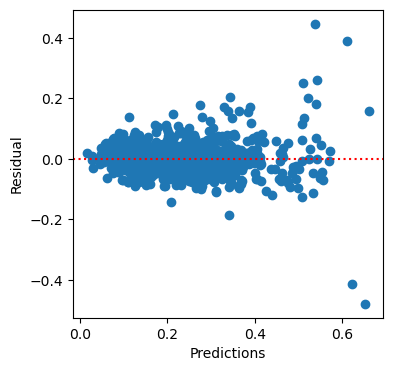

In [313]:
# Residual analysis for Train dataset
res = pd.DataFrame()
y_res_train = y_train - y_pred_train
res['res_train'] = y_res_train
plt.figure(figsize=(4,4))
plt.scatter( y_pred_train, res['res_train'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

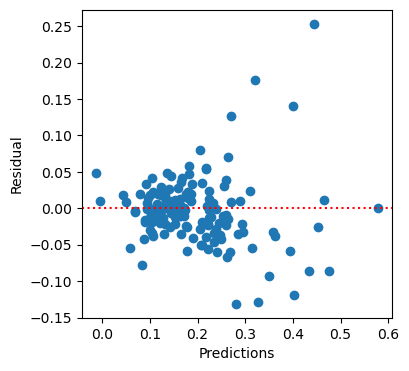

In [314]:
# Residual analysis for Test dataset
res = pd.DataFrame()
y_res_test = y_test - y_pred_test
res['res_test'] = y_res_test
plt.figure(figsize=(4,4))
plt.scatter( y_pred_test, res['res_test'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

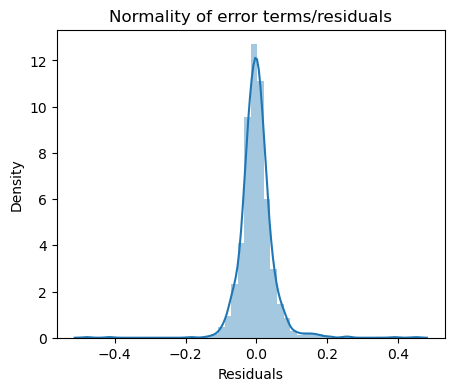

In [315]:
# Distribution of errors
plt.figure(figsize=(5,4))
sns.distplot(y_res_train,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Modal evaluation

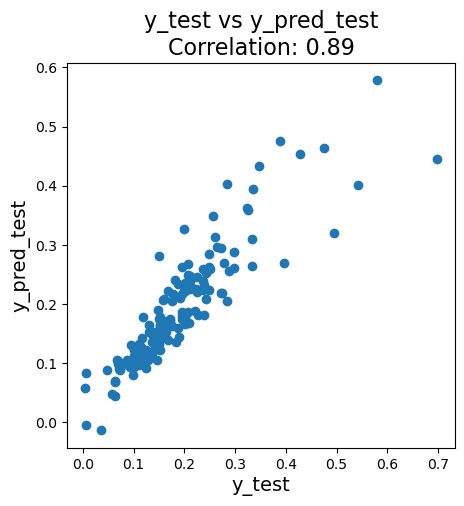

In [316]:
# Plotting y_test and y_test_pred to understand the spread
corr = round(np.corrcoef(y_test, y_pred_test)[0][1],2)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test)
plt.title('y_test vs y_pred_test' + '\nCorrelation: ' + str(corr), fontsize=16)  #Plot heading 
plt.xlabel('y_test', fontsize = 14)  # X-label
plt.ylabel('y_pred_test', fontsize = 14)  # Y-label
plt.show()

## Ridge Regression with cross validation using 5 folds

In [317]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [318]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.2}
0.7892117186141181


In [319]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
hypprm = model_cv.best_params_
alpha = hypprm['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [320]:
ridge.coef_

array([ 0.22514128,  0.10013686,  0.0133646 ,  0.03889908,  0.02036963,
        0.03076898,  0.0712316 ,  0.03614028,  0.02364712,  0.05674432,
        0.03653201,  0.00783201, -0.01232869, -0.01337164,  0.00617343,
       -0.01224515, -0.01153775, -0.01710205, -0.02116578, -0.0071372 ,
       -0.01116105,  0.01770814,  0.04999286,  0.10660902,  0.20416266,
        0.26175892, -0.08671313,  0.012031  ,  0.01898574,  0.01909394,
        0.04711803, -0.0323028 ,  0.00506868,  0.01713226,  0.01025703,
        0.00965005, -0.00865843,  0.00564834, -0.00457437,  0.01538572,
       -0.00790869,  0.02299165, -0.00589701, -0.02318547,  0.01825719,
        0.01197478, -0.01124211, -0.04150063, -0.03047812, -0.00945912,
       -0.00749844,  0.01374482, -0.00967057,  0.01416603,  0.02056754,
       -0.00696812, -0.03067648, -0.01554902, -0.00557699,  0.02503696])

In [321]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

Ridge_Regression = []
r2_train_lr_ridge = r2_score(y_train, y_pred_train_ridge)
print('R2 Score for Train dataset is {}'.format(round(r2_train_lr_ridge,4)))
Ridge_Regression.append(r2_train_lr_ridge)

Adj_r2_train_lr_ridge = 1-(1-r2_train_lr_ridge)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print('Adjusted R2 Score for Train dataset is {}'.format(round(Adj_r2_train_lr_ridge,4)))
Ridge_Regression.append(Adj_r2_train_lr_ridge)

r2_test_lr_ridge = r2_score(y_test, y_pred_test_ridge)
print('R2 Score for Test dataset is {}'.format(round(r2_test_lr_ridge,4)))
Ridge_Regression.append(r2_test_lr_ridge)

rss1_train_lr_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print('RSS for Train dataset is {}'.format(round(rss1_train_lr_ridge,4)))
Ridge_Regression.append(rss1_train_lr_ridge)

rss1_test_lr_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print('RSS for Test dataset is {}'.format(round(rss1_test_lr_ridge,4)))
Ridge_Regression.append(rss1_test_lr_ridge)

mse_train_lr_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print('Root Mean Sqauer Error for Train dataset is {}'.format(round(mse_train_lr_ridge**0.5,4)))
Ridge_Regression.append(mse_train_lr_ridge**0.5)

mse_test_lr_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print('Root Mean Sqauer Error for Test dataset is {}'.format(round(mse_test_lr_ridge**0.5,4)))
Ridge_Regression.append(mse_test_lr_ridge**0.5)

R2 Score for Train dataset is 0.8154
Adjusted R2 Score for Train dataset is 0.8066
R2 Score for Test dataset is 0.7987
RSS for Train dataset is 2.9761
RSS for Test dataset is 0.3239
Root Mean Sqauer Error for Train dataset is 0.0476
Root Mean Sqauer Error for Test dataset is 0.0471


In [322]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=1000]
ridge_results.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005350,0.005949,0.000484,0.000608,0.0001,{'alpha': 0.0001},0.808848,0.816330,0.755504,0.774432,0.789922,0.789007,0.022253,8,0.813674,0.812289,0.829306,0.819395,0.817491,0.818431,0.006007
1,0.005434,0.006580,0.000900,0.000450,0.001,{'alpha': 0.001},0.808843,0.816336,0.755507,0.774445,0.789914,0.789009,0.022251,7,0.813674,0.812289,0.829306,0.819395,0.817491,0.818431,0.006007
2,0.001344,0.001155,0.000659,0.000541,0.01,{'alpha': 0.01},0.808796,0.816391,0.755538,0.774579,0.789833,0.789027,0.022229,6,0.813674,0.812289,0.829306,0.819395,0.817491,0.818431,0.006007
3,0.003229,0.005240,0.000000,0.000000,0.05,{'alpha': 0.05},0.808584,0.816614,0.755669,0.775152,0.789466,0.789097,0.022131,5,0.813665,0.812277,0.829295,0.819384,0.817479,0.818420,0.006007
4,0.003152,0.006304,0.000000,0.000000,0.1,{'alpha': 0.1},0.808317,0.816842,0.755817,0.775830,0.788988,0.789159,0.022013,3,0.813638,0.812244,0.829263,0.819354,0.817446,0.818389,0.006007
5,0.005927,0.007277,0.000377,0.000754,0.2,{'alpha': 0.2},0.807773,0.817162,0.756064,0.777069,0.787990,0.789212,0.021787,1,0.813540,0.812124,0.829147,0.819244,0.817329,0.818277,0.006005
6,0.000000,0.000000,0.006278,0.007689,0.3,{'alpha': 0.3},0.807220,0.817337,0.756253,0.778176,0.786967,0.789191,0.021580,2,0.813392,0.811950,0.828972,0.819079,0.817163,0.818111,0.006000
7,0.004497,0.005744,0.000426,0.000523,0.4,{'alpha': 0.4},0.806660,0.817401,0.756394,0.779170,0.785939,0.789113,0.021390,4,0.813203,0.811733,0.828749,0.818869,0.816959,0.817903,0.005994


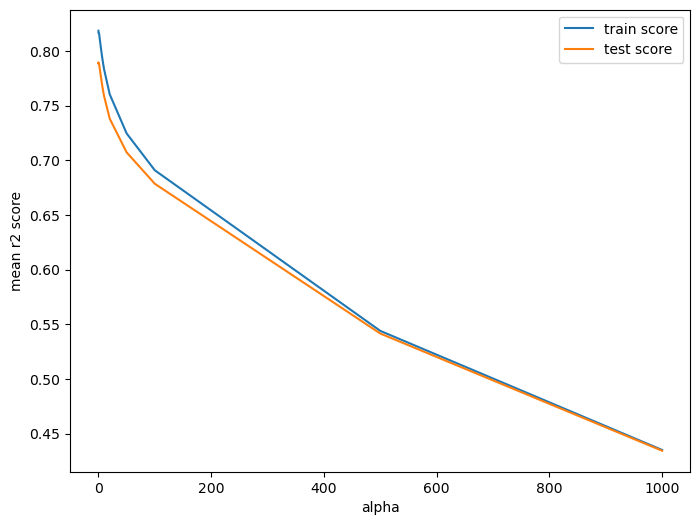

In [323]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

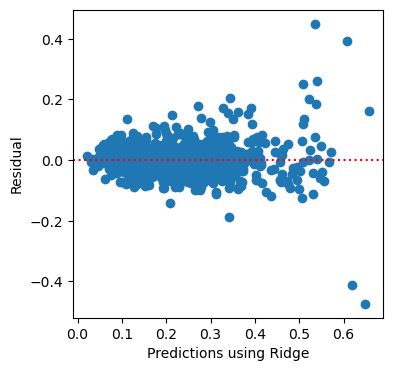

In [324]:
# Residual analysis for Train dataset
res = pd.DataFrame()
y_res_train_ridge = y_train - y_pred_train_ridge
res['res_train_ridge'] = y_res_train_ridge
plt.figure(figsize=(4,4))
plt.scatter( y_pred_train_ridge, res['res_train_ridge'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions using Ridge")
plt.ylabel("Residual")
plt.show()

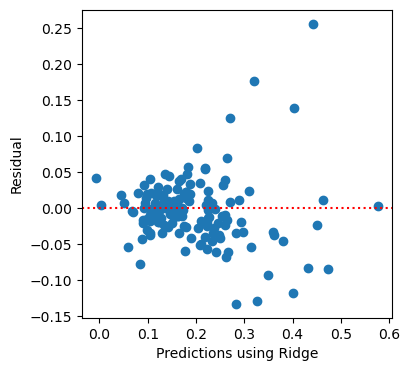

In [325]:
# Residual analysis for Test dataset
res = pd.DataFrame()
y_res_test_ridge = y_test - y_pred_test_ridge
res['res_test_ridge'] = y_res_test_ridge
plt.figure(figsize=(4,4))
plt.scatter( y_pred_test_ridge, res['res_test_ridge'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions using Ridge")
plt.ylabel("Residual")
plt.show()

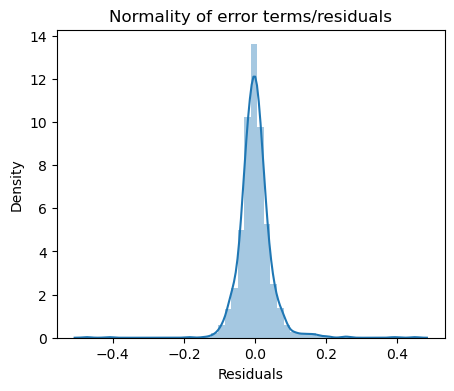

In [326]:
# Distribution of errors
plt.figure(figsize=(5,4))
sns.distplot(y_res_train_ridge,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Modal Evaluation

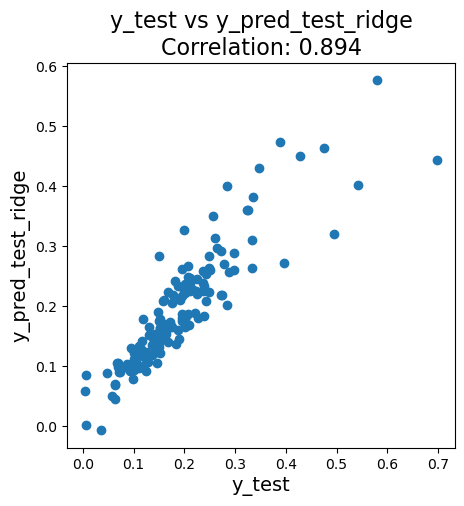

In [327]:
# Plotting y_test and y_test_pred to understand the spread
corr = round(np.corrcoef(y_test, y_pred_test_ridge)[0][1],3)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test_ridge)
plt.title('y_test vs y_pred_test_ridge' + '\nCorrelation: ' + str(corr), fontsize=16)  #Plot heading 
plt.xlabel('y_test', fontsize = 14)  # X-label
plt.ylabel('y_pred_test_ridge', fontsize = 14)  # Y-label
plt.show()

## Lasso Regression with cross validation using 5 folds

In [328]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [329]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
0.7854669932570951


In [330]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
hypprm = model_cv.best_params_
alpha = hypprm['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [331]:
lasso.coef_

array([ 0.19365349,  0.09188283,  0.00749555,  0.01973709,  0.01793335,
        0.03001911,  0.04929193,  0.03302118,  0.01275354,  0.02528473,
        0.0290174 ,  0.00839463, -0.01454812, -0.01273537,  0.00598864,
       -0.00915608, -0.01069284, -0.01497448, -0.01764579, -0.00396298,
       -0.01204243,  0.01643356,  0.04902489,  0.10584177,  0.2019285 ,
        0.26075878, -0.05950052,  0.00956739,  0.01696561,  0.01488241,
        0.0388002 , -0.00969287,  0.00558743,  0.01392521,  0.00864904,
        0.00368403, -0.00132892,  0.00461548, -0.00305289,  0.0156535 ,
       -0.00438897,  0.02371987, -0.00402994, -0.02192048,  0.01840497,
        0.01265188, -0.01070163, -0.        , -0.        , -0.0086817 ,
       -0.00731854,  0.01267806, -0.01095985,  0.01556601,  0.02137722,
       -0.0074487 , -0.02877044, -0.0106127 , -0.00444748,  0.02428381])

In [332]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

Lasso_Regression = []

r2_train_lr_lasso = r2_score(y_train, y_pred_train_lasso)
print('R2 Score for Train dataset is {}'.format(round(r2_train_lr_lasso,4)))
Lasso_Regression.append(r2_train_lr_lasso)

Adj_r2_train_lr_lasso = 1-(1-r2_train_lr_lasso)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
print('Adjusted R2 Score for Train dataset is {}'.format(round(Adj_r2_train_lr_lasso,4)))
Lasso_Regression.append(Adj_r2_train_lr_lasso)

r2_test_lr_lasso = r2_score(y_test, y_pred_test_lasso)
print('R2 Score for Test dataset is {}'.format(round(r2_test_lr_lasso,4)))
Lasso_Regression.append(r2_test_lr_lasso)

rss1_train_lr_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print('RSS for Train dataset is {}'.format(round(rss1_train_lr_lasso,4)))
Lasso_Regression.append(rss1_train_lr_lasso)

rss1_test_lr_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print('RSS for Test dataset is {}'.format(round(rss1_test_lr_lasso,4)))
Lasso_Regression.append(rss1_test_lr_lasso)

mse_train_lr_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print('Root Mean Sqauer Error for Train dataset is {}'.format(round(mse_train_lr_lasso**0.5,4)))
Lasso_Regression.append(mse_train_lr_lasso**0.5)

mse_test_lr_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print('Root Mean Sqauer Error for Test dataset is {}'.format(round(mse_test_lr_lasso**0.5,4)))
Lasso_Regression.append(mse_test_lr_lasso**0.5)

R2 Score for Train dataset is 0.8127
Adjusted R2 Score for Train dataset is 0.8038
R2 Score for Test dataset is 0.8006
RSS for Train dataset is 3.0193
RSS for Test dataset is 0.3208
Root Mean Sqauer Error for Train dataset is 0.0479
Root Mean Sqauer Error for Test dataset is 0.0469


In [333]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha']<=1000]
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001578,0.001933,0.003576,0.006435,0.0001,{'alpha': 0.0001},0.800296,0.811575,0.754844,0.777482,0.783139,0.785467,0.019537,1,0.810870,0.809872,0.826581,0.816446,0.814434,0.815641,0.005964
1,0.000517,0.000686,0.000000,0.000000,0.001,{'alpha': 0.001},0.743203,0.768439,0.731492,0.766411,0.702658,0.742441,0.024305,2,0.761211,0.762078,0.768222,0.769219,0.763445,0.764835,0.003267
2,0.003739,0.005483,0.000414,0.000508,0.01,{'alpha': 0.01},0.346828,0.400021,0.338998,0.430676,0.321680,0.367641,0.040958,3,0.376188,0.381808,0.365267,0.368856,0.373041,0.373032,0.005739
3,0.001017,0.000900,0.000574,0.000469,0.05,{'alpha': 0.05},-0.005419,-0.005313,-0.000589,-0.000358,-0.002439,-0.002824,0.002198,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003460,0.005032,0.002755,0.004973,0.1,{'alpha': 0.1},-0.005419,-0.005313,-0.000589,-0.000358,-0.002439,-0.002824,0.002198,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


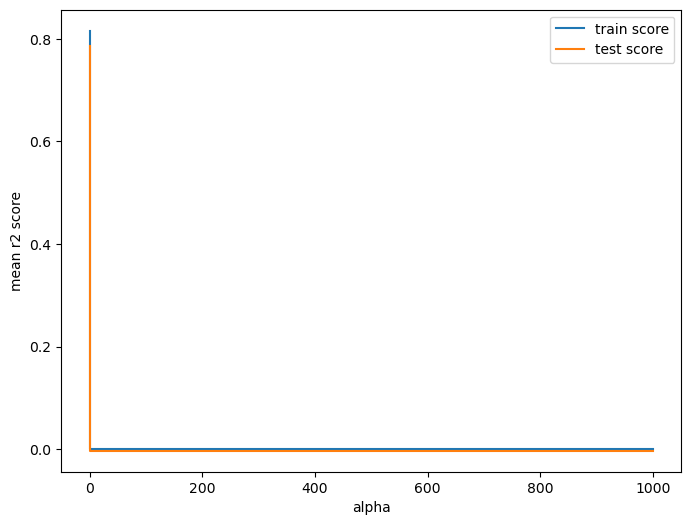

In [334]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

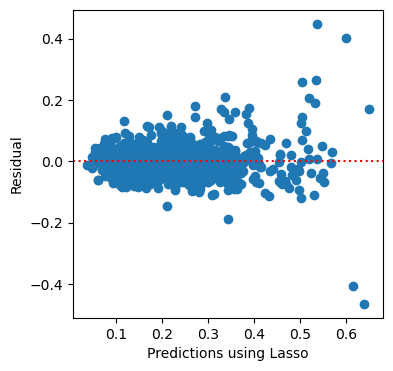

In [335]:
# Residual analysis for Train dataset
res = pd.DataFrame()
y_res_train_lasso = y_train - y_pred_train_lasso
res['res_train_lasso'] = y_res_train_lasso
plt.figure(figsize=(4,4))
plt.scatter( y_pred_train_lasso, res['res_train_lasso'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions using Lasso")
plt.ylabel("Residual")
plt.show()

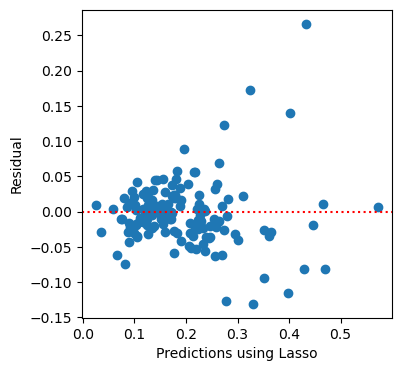

In [336]:
# Residual analysis for Test dataset
res = pd.DataFrame()
y_res_test_lasso = y_test - y_pred_test_lasso
res['res_test_lasso'] = y_res_test_lasso
plt.figure(figsize=(4,4))
plt.scatter( y_pred_test_lasso, res['res_test_lasso'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions using Lasso")
plt.ylabel("Residual")
plt.show()

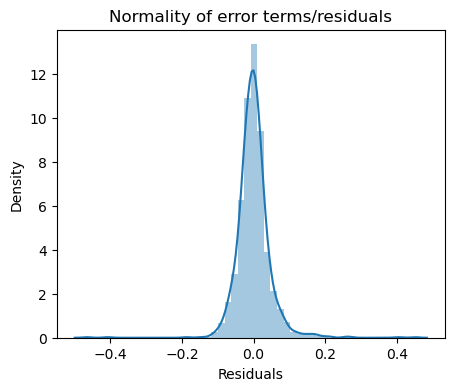

In [337]:
# Distribution of errors
plt.figure(figsize=(5,4))
sns.distplot(y_res_train_lasso,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Modal evaluation

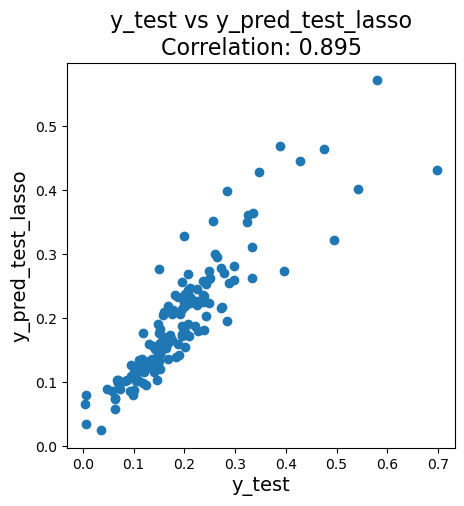

In [338]:
# Plotting y_test and y_test_pred to understand the spread
corr = round(np.corrcoef(y_test, y_pred_test_lasso)[0][1],3)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test_lasso)
plt.title('y_test vs y_pred_test_lasso' + '\nCorrelation: ' + str(corr), fontsize=16)  #Plot heading 
plt.xlabel('y_test', fontsize = 14)  # X-label
plt.ylabel('y_pred_test_lasso', fontsize = 14)  # Y-label
plt.show()

In [339]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','Adj R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': Linear_Regression
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(Ridge_Regression, name = 'Ridge Regression')
ls_metric = pd.Series(Lasso_Regression, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.815518,0.815417,0.812742
1,Adj R2 Score (Train),0.806684,0.806578,0.803775
2,R2 Score (Test),0.797489,0.798727,0.800650
3,RSS (Train),2.974489,2.976121,3.019259
4,RSS (Test),0.325874,0.323881,0.320787
5,RMSE (Train),0.047578,0.047591,0.047935
6,RMSE (Test),0.047244,0.047100,0.046874


## Change in the coefficients after regularization

In [340]:
cols = X_train.columns
betas = pd.DataFrame(index=cols)
betas.rows = cols
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head()

,Linear,Ridge,Lasso
LotArea,0.246501,0.225141,0.193653
MasVnrArea,0.099844,0.100137,0.091883
BsmtFinSF2,0.012961,0.013365,0.007496
LowQualFinSF,0.039375,0.038899,0.019737
BsmtFullBath,0.019897,0.020370,0.017933


# Conclusion

- The R-squared score on predicted data from test dataset is 0.797 for Linear, 0.798 for Ridge and 0.8006 for Lasso Regression.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of House price prediction. 

- Lasso Regression model can be used to make inferences. This is based on high Test R2 score and RMSE values using best alpha.

- The top 10 variables based on the coeffiencients selected inorder and significant in predicting the house prices are.
    
    __From Linear and Ridge Regression:__
    OverallQual_10, LotArea, OverallQual_9, OverallQual_8, MasVnrArea, KitchenAbvGr, 3SsnPorch, OverallQual_7, OverallCond_9, 
    LowQualFinSF
     
    __From Lasso Regression:__
    OverallQual_10, OverallQual_9, LotArea, OverallQual_8, MasVnrArea, KitchenAbvGr, OverallQual_7, OverallCond_9, WoodDeckSF, 
    HalfBath   
    

- The optimal value of lambda for Ridge is 0.2 and for Lasso regression is 0.0001.
    
- Using Linear regression, we can predict the house price with 0.79% confidence.
- Using Ridge regression, we can predict the house price with 0.79% confidence.
- Using Lasso regression, we can predict the house price with 0.80% confidence.

In [341]:
round((betas['Linear'].sort_values(ascending = False).head(15)),3)

OverallQual_10           0.267
LotArea                  0.247
OverallQual_9            0.208
OverallQual_8            0.108
MasVnrArea               0.100
KitchenAbvGr             0.073
3SsnPorch                0.060
OverallQual_7            0.051
OverallCond_9            0.047
LowQualFinSF             0.039
ScreenPorch              0.037
WoodDeckSF               0.036
HalfBath                 0.031
SaleCondition_Partial    0.025
EnclosedPorch            0.024
Name: Linear, dtype: float64

In [342]:
round(betas['Ridge'].sort_values(ascending = False).head(15),3)

OverallQual_10           0.262
LotArea                  0.225
OverallQual_9            0.204
OverallQual_8            0.107
MasVnrArea               0.100
KitchenAbvGr             0.071
3SsnPorch                0.057
OverallQual_7            0.050
OverallCond_9            0.047
LowQualFinSF             0.039
ScreenPorch              0.037
WoodDeckSF               0.036
HalfBath                 0.031
SaleCondition_Partial    0.025
EnclosedPorch            0.024
Name: Ridge, dtype: float64

In [343]:
round(betas['Lasso'].sort_values(ascending = False).head(15),3)

OverallQual_10           0.261
OverallQual_9            0.202
LotArea                  0.194
OverallQual_8            0.106
MasVnrArea               0.092
KitchenAbvGr             0.049
OverallQual_7            0.049
OverallCond_9            0.039
WoodDeckSF               0.033
HalfBath                 0.030
ScreenPorch              0.029
3SsnPorch                0.025
SaleCondition_Partial    0.024
BsmtQual_Other           0.024
FireplaceQu_TA           0.021
Name: Lasso, dtype: float64

# Ridge regression with optimal alpha = 0.4

In [344]:
# Instantiate Ridge regression with alpha=2
ridge_upd = Ridge(alpha=0.4)
# Fitting the model with the train set
ridge_upd.fit(X_train, y_train)

Ridge(alpha=0.4)

In [345]:
y_train_pred = ridge_upd.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8151618926266218


In [346]:
y_test_pred = ridge_upd.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.7994928631567442


In [347]:
# Coefficients list
ridge_upd_parameters = list(ridge_upd.coef_)
# Inserting Y Intercept to model parameters list
ridge_upd_parameters.insert(0, ridge_upd.intercept_)
# Rounding off the coefficients
ridge_upd_parameters = [round(i,3) for i in ridge_upd_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_upd_list = list(zip(cols, ridge_upd_parameters))

In [348]:
ridge_upd_params_df = pd.DataFrame({'Params':cols, 'Coef':ridge_upd_parameters})
(ridge_upd_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
26,OverallQual_10,0.257
1,LotArea,0.207
25,OverallQual_9,0.201
0,constant,0.133
24,OverallQual_8,0.105
2,MasVnrArea,0.100
7,KitchenAbvGr,0.070
10,3SsnPorch,0.054
23,OverallQual_7,0.049
31,OverallCond_9,0.047


# Lasso regression with optimal alpha = 0.0002

In [349]:
# Instantiate Lasso regression with alpha=0.002
lasso_upd = Lasso(0.0002)
# Fitting the model with the train set
lasso_upd.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [350]:
y_train_pred = lasso_upd.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8063780714351974


In [351]:
y_test_pred = lasso_upd.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.7925321427803068


In [352]:
# Coefficients list
lasso_upd_parameters = list(lasso_upd.coef_)
# Inserting Y Intercept to model parameters list
lasso_upd_parameters.insert(0, lasso_upd.intercept_)
# Rounding off the coefficients
lasso_upd_parameters = [round(i,3) for i in lasso_upd_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_upd_parameters))

In [353]:
# Parameters having coefficients greater than 1
lasso_upd_params_df = pd.DataFrame({'Params':cols, 'Coef':lasso_upd_parameters})
(lasso_upd_params_df.sort_values('Coef',ascending=False)).head(11)

,Params,Coef
26,OverallQual_10,0.254
25,OverallQual_9,0.196
1,LotArea,0.141
0,constant,0.138
24,OverallQual_8,0.103
2,MasVnrArea,0.084
23,OverallQual_7,0.047
31,OverallCond_9,0.031
8,WoodDeckSF,0.031
6,HalfBath,0.029
